# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset, collected from The Movie Database (TMDb), contains information on over 10,000 movies, spanning various decades. It includes details about each film, such as its budget, revenue, cast, director, genre, and user ratings.

**Columns:**

* `id`: Unique identifier for each movie
* `imdb_id`: Unique identifer from IMDb
* `popularity`: A measure of the movie's popularity
* `budget`: The movie's budget
* `revenue`: The movie's revenue
* `original_title`: The original title of the movie
* `cast`: List of actors in the movie, separated by '|'
* `homepage`: Link to the movie's homepage
* `director`: The director of the movie
* `tagline`: A tagline for the movie
* `keywords`: Keywords associated with the movie
* `overview`: A brief synopsis of the movie
* `runtime`: The runtime of the movie in minutes
* `genres`: List of genres associated with the movie, separated by '|'
* `production_companies`: List of production companies, separated by '|'
* `release_date`: The release date of the movie
* `vote_count`: Number of votes the movie has received
* `vote_average`: Average user rating
* `release_year`: The year the movie was released
* `budget_adj`: Adjusted budget (accounting for inflation)
* `revenue_adj`: Adjusted revenue

### Key Research Questions

This analysis aims to uncover insights into movie trends, financial success, and the impact of factors like genre, cast, director, and production company.  Here are the key questions we'll explore:

1. **Genre Trends by Decade:** How has the popularity of different movie genres changed across decades?

2. **Average Actor Revenue:**  Do certain actors consistently appear in higher-grossing movies? Can we identify the most bankable stars?

3. **Production Company Success:** Do certain production companies have a higher average revenue or popularity score? Are there companies that dominate specific genres?

4. **Production Companies and Budget Trends:**  Do certain companies favor high-budget or low-budget productions?

5. **Most Profitable Movies:** What are the most profitable movies in the dataset?  What are the most profitable movies in each decade?

6. **Director Impact on Ratings:** Do movies by certain directors tend to receive consistently higher ratings, even when considering genre and budget?

7. **The "Summer Blockbuster" Effect:** Do movies released during summer (June-August) perform better financially or in popularity compared to other seasons?

8. **Popularity and Release Month:**  Does the release month influence a movie's popularity? Are certain genres more popular in specific months?

In [1559]:
# Import necessary libraries for data analysis and visualization
import pandas as pd   # Pandas for data manipulation and analysis
import numpy as np    # NumPy for numerical operations and array handling
import matplotlib.pyplot as plt # Matplotlib for creating static, interactive, and animated visualizations

# Enable inline plotting in Jupyter Notebook 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling:  Preparing the Data for Analysis

### General Properties: A First Look at the Data

In [1560]:
# Load the TMDb movie data into a Pandas DataFrame
df = pd.read_csv('tmdb-movies.csv')  

# Display the first few rows of the DataFrame to get an initial overview of the data
print(df.head())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [1561]:
# Display the shape of the DataFrame (number of rows and columns)
print(df.shape)   # Output: (number_of_rows, number_of_columns)

(10866, 21)


> This line of code shows us the dimensions of the dataset, telling us how many rows (movies) and columns (features) the DataFrame contains.

In [1562]:
# Get information about the DataFrame (column names, data types, non-null counts)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> The `.info()` method is incredibly useful for understanding the structure of the DataFrame. It provides:
Column names: A list of all the columns (features) in the DataFrame.
Data types: The data type of each column (e.g., int64 for integers, object for strings, float64 for floating-point numbers).
Non-null counts: The number of non-missing values in each column. This helps identify columns with missing data, which we'll likely need to address during data cleaning.

In [1563]:
# Get a breakdown of data types and their counts
data_type_counts = df.dtypes.value_counts()
print(data_type_counts)

object     11
int64       6
float64     4
Name: count, dtype: int64


> `df.dtypes` returns a Series where the index is the column names, and the values are the data types of those columns. `.value_counts()` is a method that when applied to the dtypes Series, counts the occurrences of each unique data type, giving you a breakdown of how many columns are of each type.

In [1564]:
# Loop through each unique data type
for dtype, count in data_type_counts.items():
    print(f"--- Data Type: {dtype} ---")
    print(f"Number of columns: {count}")
    
    # Get a list of columns with the current data type
    columns_with_dtype = df.select_dtypes(include=[dtype]).columns.tolist()
    print(f"Columns: {columns_with_dtype}")
    print("\n")

--- Data Type: object ---
Number of columns: 11
Columns: ['imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'release_date']


--- Data Type: int64 ---
Number of columns: 6
Columns: ['id', 'budget', 'revenue', 'runtime', 'vote_count', 'release_year']


--- Data Type: float64 ---
Number of columns: 4
Columns: ['popularity', 'vote_average', 'budget_adj', 'revenue_adj']




> I use `.value_counts()` on the `dtypes` attribute to get a count of each unique data type. I iterate through the `data_type_counts` Series, unpacking the data type (`dtype`) and its count (`count`).

In [1565]:
# Generate descriptive statistics for numerical columns
# count: The number of non-missing values.
# mean: The average value.
# std: The standard deviation (a measure of spread).
# min: The minimum value.
# 25%: The 25th percentile (first quartile).
# 50%: The 50th percentile (median).
# 75%: The 75th percentile (third quartile).
# max: The maximum value.
print(df.describe())

                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.8129

> The `.describe()` method provides a summary of descriptive statistics for all numerical columns in the DataFrame. 

In [1566]:
# Generate descriptive statistics for object columns (e.g., strings)
# count: Number of non-missing values.
# unique: Number of unique values.
# top: The most frequent value.
# freq: The frequency of the most frequent value.
print(df.describe(include=['object']))

          imdb_id original_title        cast  \
count       10856          10866       10790   
unique      10855          10571       10719   
top     tt0411951         Hamlet  Louis C.K.   
freq            2              4           6   

                                homepage     director                 tagline  \
count                               2936        10822                    8042   
unique                              2896         5067                    7997   
top     http://www.thehungergames.movie/  Woody Allen  Based on a true story.   
freq                                   4           45                       5   

              keywords            overview  genres production_companies  \
count             9373               10862   10843                 9836   
unique            8804               10847    2039                 7445   
top     woman director  No overview found.  Comedy   Paramount Pictures   
freq               134                  13     712   

> To get descriptive stats for object columns (typically strings), we use `df.describe(include=['object'])`. 

In [1567]:
# Check for missing values (NaN) in each column
missing_values = df.isnull().sum()
print(missing_values)

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


> The `.isnull().sum()` method is crucial for identifying missing data in our DataFrame. It checks each column for missing values (represented by `NaN`) and returns a Series containing the count of missing values for each column.

In [1568]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of Missing Values:\n", missing_percentage)


Percentage of Missing Values:
 id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64


> I've added a calculation to express missing values as percentages. This provides a clearer sense of the proportion of missing data in each column relative to the total number of rows.

In [1569]:
# Create copies of the DataFrame to avoid modifying the original
df_genres = df.copy()
df_prod_companies = df.copy()
df_director = df.copy()
df_cast = df.copy()

> I created separate copies of the DataFrame (`df_genres`, `df_prod_companies`, `df_director`, `df_cast`) to avoid modifying the original data during the exploration. This ensures that any changes made (such as exploding columns) don't affect the original DataFrame.

In [1570]:
# Explore unique values and counts in the 'genres' column
print("--- Genres ---")
print("Unique Genres:", df_genres['genres'].explode().unique())
print("\nGenre Counts:\n", df_genres['genres'].explode().value_counts())

--- Genres ---
Unique Genres: ['Action|Adventure|Science Fiction|Thriller'
 'Adventure|Science Fiction|Thriller'
 'Action|Adventure|Science Fiction|Fantasy' ...
 'Adventure|Drama|Action|Family|Foreign' 'Comedy|Family|Mystery|Romance'
 'Mystery|Science Fiction|Thriller|Drama']

Genre Counts:
 genres
Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: count, Length: 2039, dtype: int64


In [1571]:
# Explode 'genres' column for analysis
df_genres = df_genres.explode('genres', ignore_index=True)
print("\nShape after exploding 'genres':", df_genres.shape)


Shape after exploding 'genres': (10866, 21)


In [1572]:
# Explore unique values and counts in the 'production_companies' column
print("\n--- Production Companies ---")
print("Unique Production Companies:", df_prod_companies['production_companies'].explode().unique())
print("\nProduction Company Counts:\n", df_prod_companies['production_companies'].explode().value_counts())


--- Production Companies ---
Unique Production Companies: ['Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu'
 'Village Roadshow Pictures|Kennedy Miller Productions'
 'Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel'
 ... 'Cherokee Productions|Joel Productions|Douglas & Lewis Productions'
 'Benedict Pictures Corp.' 'Norm-Iris']

Production Company Counts:
 production_companies
Paramount Pictures                       156
Universal Pictures                       133
Warner Bros.                              84
Walt Disney Pictures                      76
Columbia Pictures                         72
                                        ... 
Silverwood Films                           1
Lunch Box Entertainment                    1
Atitude ProduÃ§Ãµes e Empreendimentos      1
Mulmur Feed Company                        1
Norm-Iris                                  1
Name: count, Length: 7445, dtype: int64


In [1573]:
# Explode 'production_companies' column for analysis
df_prod_companies = df_prod_companies.explode('production_companies', ignore_index=True)
print("\nShape after exploding 'production_companies':", df_prod_companies.shape)


Shape after exploding 'production_companies': (10866, 21)


In [1574]:
# Explore unique values and counts in the 'director' column
print("\n--- Directors ---")
print("Unique Directors:", df_director['director'].unique())
print("\nDirector Counts:\n", df_director['director'].value_counts())


--- Directors ---
Unique Directors: ['Colin Trevorrow' 'George Miller' 'Robert Schwentke' ... 'Alan Rafkin'
 'Bruce Brown' 'Harold P. Warren']

Director Counts:
 director
Woody Allen                 45
Clint Eastwood              34
Martin Scorsese             29
Steven Spielberg            29
Ridley Scott                23
                            ..
Jeffrey Porter               1
Larry Shaw                   1
Bill Pohlad                  1
Andy Hamilton|Guy Jenkin     1
Harold P. Warren             1
Name: count, Length: 5067, dtype: int64


In [1575]:
# Explode 'production_companies' column for analysis
df_prod_companies = df_director.explode('director', ignore_index=True)
print("\nShape after exploding 'director':", df_director.shape)


Shape after exploding 'director': (10866, 21)


In [1576]:
# Explore unique values and counts in the 'cast' column
print("\n--- Cast ---")
print("Unique Cast Members:", df_cast['cast'].explode().unique())
print("\nCast Member Counts:\n", df_cast['cast'].explode().value_counts())


--- Cast ---
Unique Cast Members: ["Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson"
 'Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman'
 'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller' ...
 'Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya'
 'Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru'
 'Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson']

Cast Member Counts:
 cast
Louis C.K.                                                                        6
William Shatner|Leonard Nimoy|DeForest Kelley|James Doohan|George Takei           5
Bill Burr                                                                         4
Aziz Ansari                                                                       3
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom                  3
                                               

In [1577]:
# Explode 'cast' column for analysis
df_cast = df_cast.explode('cast', ignore_index=True)
print("\nShape after exploding 'cast':", df_cast.shape)


Shape after exploding 'cast': (10866, 21)


> I exploded the `'genres'`, `'production_companies'`, `'director'` and `'cast'` columns. Exploding these columns is essential for analyzing individual genres, production companies, and actors. It creates a new row for each element in the original list, replicating the other data for the movie.

In [1578]:
# View the last 10 rows of the DataFrame
print(df.tail(10))

          id    imdb_id  popularity  budget  revenue  \
10856  20277  tt0061135    0.140934       0        0   
10857   5921  tt0060748    0.131378       0        0   
10858  31918  tt0060921    0.317824       0        0   
10859  20620  tt0060955    0.089072       0        0   
10860   5060  tt0060214    0.087034       0        0   
10861     21  tt0060371    0.080598       0        0   
10862  20379  tt0060472    0.065543       0        0   
10863  39768  tt0060161    0.065141       0        0   
10864  21449  tt0061177    0.064317       0        0   
10865  22293  tt0060666    0.035919   19000        0   

                                         original_title  \
10856                                The Ugly Dachshund   
10857                                      Nevada Smith   
10858  The Russians Are Coming, The Russians Are Coming   
10859                                           Seconds   
10860                               Carry On Screaming!   
10861                        

> The `.tail(10)` method allows us to quickly inspect the last few rows of the DataFrame. It displays the last 10 rows, giving us a glimpse of the data at the end of the dataset.

### Data Cleaning: Preparing the Data for Analysis
> This section focuses on cleaning and preparing the data for analysis. I will handle missing values, convert data types to the appropriate formats, and make other necessary changes to ensure our data is ready for exploration and modeling.

In [1579]:
# 1. Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')

**Converting 'release_date' to Datetime:**

The `release_date` column was initially loaded as string objects. I converted them into datetime objects to easily extract the year or month of release later in my analysis. I included the `format='%m/%d/%y'` argument within `pd.to_datetime()`, specifying the format of the dates in the CSV file. 

   Here's a breakdown of the format codes:

   * `%m`: Represents the month as a zero-padded decimal number (e.g., '06', '12').
   * `%d`: Represents the day of the month as a zero-padded decimal number.
   * `%y`: Represents the year with a century as a zero-padded decimal number (e.g., '15' for 2015).

   This explicit format specification ensures that Pandas correctly parses the dates from strings into datetime objects, enabling accurate time-based analysis. 

In [1580]:
# 2. Handle Missing Values in 'imdb_id', 'cast', 'director', 'genres', and 'production_companies' 
# We'll fill missing values with 'Unknown' for these columns
for col in ['imdb_id', 'cast', 'director', 'genres', 'production_companies']:
    df.loc[:, col] = df[col].fillna('Unknown') # Use .loc for safe assignment

**Handling Missing Values (Safely):** 

   ```python
   # 2. Handle Missing Values in 'imdb_id', 'cast', 'director', 'genres', and 'production_companies' 
   for col in ['imdb_id', 'cast', 'director', 'genres', 'production_companies']:
       df.loc[:, col] = df[col].fillna('Unknown')  # Use .loc for safe assignment
   ```

During data inspection, I discovered missing values in the `imdb_id`, `cast`, `director`, `genres`, and `production_companies` columns. Since these columns contain text data, filling the missing values with "Unknown" was the best approach to retain these rows without introducing bias. However, using `fillna('Unknown', inplace=True)` led to a "FutureWarning" about chained assignment.

To address this warning,  I've modified the code to use `.loc[:, col]` for safer assignment. This guarantees modification of the original DataFrame, avoiding potential copies and warnings.  

In [1581]:
# 3.  Drop unnecessary columns for our analysis
df.drop(['homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

**Dropping Unnecessary Columns:**

Columns `homepage`, `tagline`, `keywords`, and `overview` are irrelevant to our research questions. We can safely drop these to reduce complexity. 

In [1582]:
# 4.  Create a Profit Column 
df['profit'] = df['revenue_adj'] - df['budget_adj']

**Profit Column:** I added a `profit` column, as it is important for analyzing the financial success of a film.

In [1583]:
# 5. Split 'genres', 'cast', and 'production_companies' into lists
for col in ['genres', 'cast', 'production_companies']:
    df[col] = df[col].str.split('|')

**Splitting String Columns:** 

I'll split the `genres`, `cast`, and `production_companies` columns into lists of individual elements. These columns originally had multiple values separated by "|". Splitting them makes it possible to analyze individual genres, actors, and production companies.

In [1584]:
# 6.  Create a "decade" column
df['decade'] = (df['release_year'] // 10) * 10  # Calculate decade based on release year

**Creating a Decade Column:** 

To answer our research question related to trends over decades, I created a new `decade` column to categorize movies based on their release decade.

In [1585]:
# Find the unique decades in your dataset and sort them in ascending order
unique_decades = sorted(df['decade'].unique())  # Use sorted() to get decades in order
print(unique_decades)

# Calculate the number of unique decades
num_decades = df['decade'].nunique()
print(f"Number of unique decades: {num_decades}")

[1960, 1970, 1980, 1990, 2000, 2010]
Number of unique decades: 6


**Find the Unique Decades:** 
I wanted to understand the range of decades covered by my dataset. I found all the unique values in the `'decade'` column using `.unique()`. I then used `sorted()` to order the decades chronologically.  I've also added a calculation to find out the total number of unique decades in the dataset using `.nunique()`. This gives me a sense of the timespan covered by my movie data.

In [1586]:
# 7.  Extract release month from 'release_date'
df['release_month'] = df['release_date'].dt.month

**Extracting Release Month:** 

Similar to creating the `decade` column, extracting the release month enables me to explore trends related to a movie's release month. Since the `'release_date'` column is now in datetime format, I can easily extract the month using `dt.month` and create a new `'release_month'` column.

In [1587]:
# 8. Create a 'release_season' column based on the month
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

df['release_season'] = df['release_month'].apply(get_season)
print(df[['release_date', 'release_month', 'release_season']].head())

  release_date  release_month release_season
0   2015-06-09              6         Summer
1   2015-05-13              5         Spring
2   2015-03-18              3         Spring
3   2015-12-15             12         Winter
4   2015-04-01              4         Spring


**Creating Release Season:** 

I defined a function `get_season` that takes a month number as input and returns the corresponding season (Spring, Summer, Fall, or Winter). I then use the `apply` method to apply this function to each value in the `release_month` column, creating a new `release_season` column.

In [1588]:
# 9. Check for duplicates based on 'original_title', 'release_year', and 'director'.
duplicates = df.duplicated(subset=['original_title', 'release_year', 'director'], keep=False)

# Display the potential duplicate entries
print(df[duplicates])

         id    imdb_id  popularity    budget  revenue original_title  \
2089  42194  tt0411951     0.59643  30000000   967000         TEKKEN   
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast          director  \
2089  [Jon Foo, Kelly Overton, Cary-Hiroyuki Tagawa,...  Dwight H. Little   
2090  [Jon Foo, Kelly Overton, Cary-Hiroyuki Tagawa,...  Dwight H. Little   

      runtime                                             genres  ...  \
2089       92  [Crime, Drama, Action, Thriller, Science Fiction]  ...   
2090       92  [Crime, Drama, Action, Thriller, Science Fiction]  ...   

     release_date vote_count  vote_average  release_year  budget_adj  \
2089   2010-03-20        110           5.0          2010  30000000.0   
2090   2010-03-20        110           5.0          2010  30000000.0   

      revenue_adj      profit  decade  release_month  release_season  
2089     967000.0 -29033000.0    2010      

**Checking for Duplicates:** 

Using the `.duplicated()` method, I've checked for duplicate entries. The `keep=False` parameter ensures that all potential duplicates are marked `True`.

In [1589]:
# 10. Remove duplicates 
# I'll keep the first occurrence of each duplicate
df.drop_duplicates(subset=['original_title', 'release_year', 'director'], keep='first', inplace=True)

**Keeping the First Occurrence:** 

By using the `keep='first'` argument, I am telling Pandas to keep the first occurrence of a duplicated entry.

In [1590]:
# 11. Confirm duplicate removal 
duplicates = df.duplicated(subset=['original_title', 'release_year', 'director'], keep=False)
print(df[duplicates]) # should display no rows!

Empty DataFrame
Columns: [id, imdb_id, popularity, budget, revenue, original_title, cast, director, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj, profit, decade, release_month, release_season]
Index: []

[0 rows x 21 columns]


**Confirming Duplicate Removal:** 

I ran the `df.duplicated` check again (with `keep=False` to catch all instances), but no rows should display now that I've removed duplicates.

In [1591]:
# How many movies have zero budget?
print(df[df['budget'] == 0].shape[0])

# How many movies have zero revenue?
print(df[df['revenue'] == 0].shape[0])

# Count how many movies still have zero adjusted budget
print(df[df['budget_adj'] == 0].shape[0])

# Count how many movies still have zero adjusted revenue
print(df[df['revenue_adj'] == 0].shape[0])

5696
6016
5696
6016


**Zero Values in Financial Columns:** 

As we can see, a large portion of the movies in the dataset have zero values for `budget`, `revenue`, `budget_adj`, and `revenue_adj`. This is likely due to missing data, rather than true zero values.

In [1592]:
# Explore a sample of movies with zero budget
print(df[df['budget'] == 0].sample(10))

           id    imdb_id  popularity  budget  revenue          original_title  \
7731    14148  tt0473356    0.174946       0        0               The Flock   
398    334028  tt3698558    0.277613       0        0       Some Kind Of Hate   
7877    13570  tt0080040    0.077321       0        0            Tourist Trap   
3277    16277  tt1286809    0.258333       0        0  La JournÃ©e de la jupe   
5137    24860  tt0374345    0.268921       0        0       De Zaak Alzheimer   
1623    29182  tt0914837    0.410830       0        0           44 Inch Chest   
6027   223202  tt3148468    0.052986       0        0               L'arbitro   
600    332479  tt4550996    0.047256       0        0  Star Wars: TIE Fighter   
6743    10051  tt0444112    0.407429       0        0   Fauteuils d'orchestre   
10188    6037  tt0074937    0.672483       0        0         Murder by Death   

                                                    cast  \
7731   [Richard Gere, Claire Danes, KaDee Strick

**Examining Zero Values:** 

A quick glance at random rows with zero values for `budget` confirms a likely problem – these are big-budget Hollywood productions, with prominent actors. It is improbable for these films to have had zero budgets, indicating these values likely represent missing data. The `revenue`, `budget_adj`, and `revenue_adj` fields have similar patterns.

In [1593]:
# 12. Replace zeros with NaN in 'budget' and 'revenue'
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)

# 13. Replace zeros with NaN in 'budget_adj' and 'revenue_adj'
df['budget_adj'] = df['budget_adj'].replace(0, np.nan)
df['revenue_adj'] = df['revenue_adj'].replace(0, np.nan)

**Replacing Zeros with `NaN`:** 

I used the `.replace(0, np.nan)` method to substitute zero values in all four columns with `NaN` (Not a Number), which is Pandas' standard representation for missing data.

In [1594]:
# Checking for Missing Values
print(df.isnull().sum())

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
director                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
profit                     0
decade                     0
release_month              0
release_season             0
dtype: int64


**Confirming `NaN` Replacement:** 

As you can see, we have successfully replaced zeros with `NaN` in `budget`, `revenue`, `budget_adj`, and `revenue_adj`.

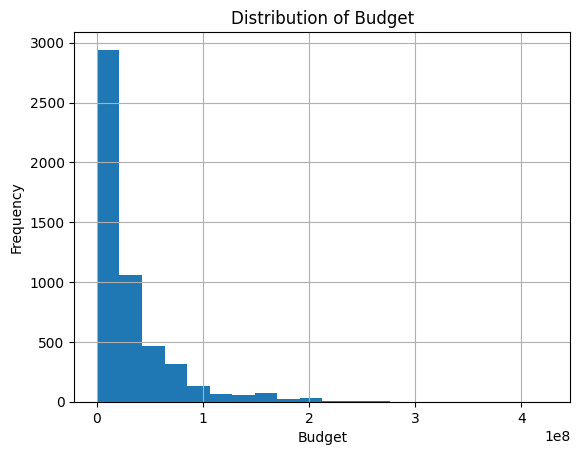

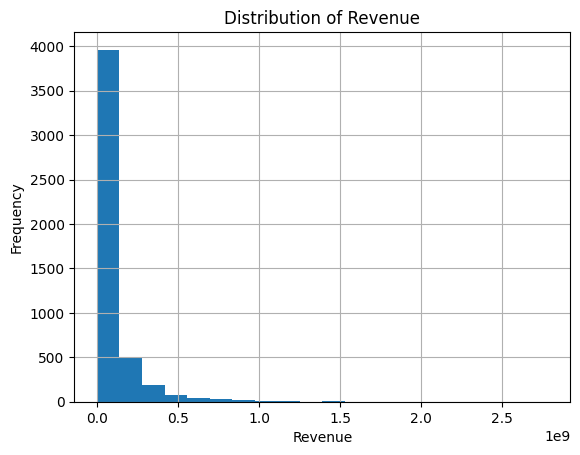

In [1595]:
# Visualizing Data Distribution: 
# Histograms:  Visualize the shapes of 'budget' and 'revenue'
df['budget'].hist(bins=20)
plt.title("Distribution of Budget")
plt.xlabel("Budget")
plt.ylabel("Frequency")
plt.show()

df['revenue'].hist(bins=20)
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

**Visualizing Distributions with Histograms:** 

I used histograms to visualize the distribution of the `budget` and `revenue` columns. Histograms show the frequency of data points within specific ranges (bins).

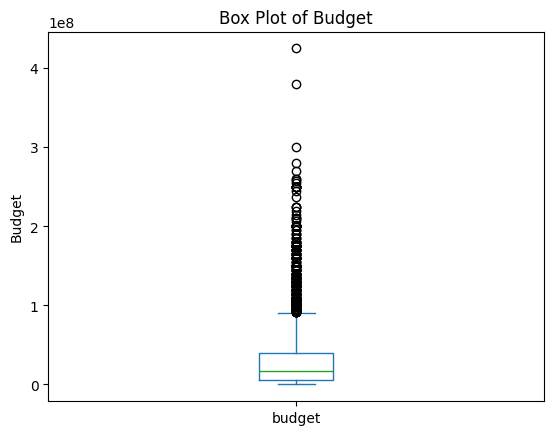

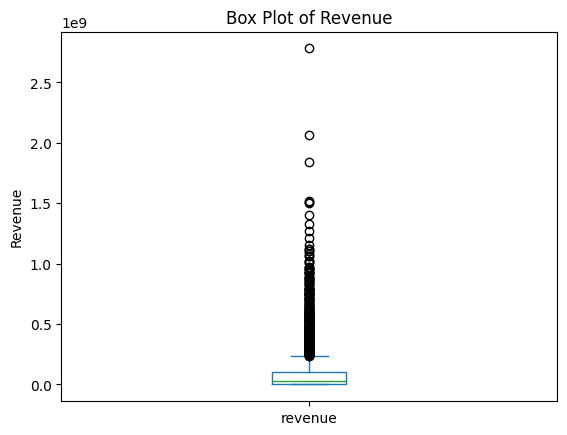

In [1596]:
# Box Plots:  Identify Outliers 
df['budget'].plot(kind='box')
plt.title("Box Plot of Budget")
plt.ylabel("Budget")
plt.show()

df['revenue'].plot(kind='box')
plt.title("Box Plot of Revenue")
plt.ylabel("Revenue")
plt.show()

**Visualizing Distributions and Outliers:**

I used **box plots** to further visualize the distributions and identify potential outliers. Box plots provide a concise representation of the data's **quartiles**, **median**, and **outliers**.  

In [1597]:
#  Quantifying Skewness:
print(df['budget'].skew()) 
print(df['revenue'].skew())

2.665910870415738
4.6899441760073435


**Checking for Skewness:**

I used the `.skew()` method to quantify the skewness of both `budget` and `revenue`. A positive skew value indicates right-skewness, a negative value indicates left-skewness, and a value close to 0 suggests symmetry.

**Interpreting Skewness:**

* **Skewness > 1 or < -1:** Significantly skewed.
* **Skewness between 0.5 and 1 or -0.5 and -1:** Moderately skewed.
* **Skewness close to 0:** Approximately symmetrical.

Here's what we found:

* **`budget` (skewness = 2.66):** The budget data is **significantly right-skewed**. This means a few movies with extremely high budgets are pulling the distribution to the right.

* **`revenue` (skewness = 4.68):** The revenue data is **even more strongly right-skewed**. This indicates a few blockbuster films with exceptionally high revenues. 

In [1598]:
# 14. Impute missing values using the median
for column in ['budget', 'revenue', 'budget_adj', 'revenue_adj']:
    df[column] = df[column].fillna(df[column].median())

# Verify that missing values have been filled
print(df.isnull().sum())

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
decade                  0
release_month           0
release_season          0
dtype: int64


**Median Imputation:**

```python
    # Impute missing 'budget', 'revenue', 'budget_adj', and 'revenue_adj' values using the median
    for column in ['budget', 'revenue', 'budget_adj', 'revenue_adj']:
        df[column] = df[column].fillna(df[column].median()) # Avoid chained assignment 
```

Since the budget and revenue data are right-skewed and contain potential outliers, I chose median imputation to fill in the missing values. The median is less influenced by extreme values compared to the mean, making it a more robust choice. I avoided the chained assignment issue by explicitly assigning the result of `.fillna()` back to the column. This ensures that the imputation is performed on the original DataFrame, preventing the warning and applying changes correctly. 

In [1599]:
# 15. Convert budget, revenue, and profit columns to millions
for col in ['budget', 'revenue', 'budget_adj', 'revenue_adj', 'profit']:
    df[col] = df[col] / 1e6 # Divide by 1 million
    df.rename(columns={col: col + '_millions'}, inplace=True)  # Rename for clarity

**Loop and Conversion:**

I used a `for` loop to iterate through the columns `'budget'`, `'revenue'`, `'budget_adj'`, `'revenue_adj'`, and `'profit'`. Within the loop, I divided each column by `1e6` (1 million) to convert the values to millions. I also used `.rename()` to add "_millions" to the column names, making it clear that the values are now in millions.  

In [1600]:
# 16. Create a "revenue_billions" column for very high-grossing films
df['revenue_billions'] = df['revenue_millions'] / 1000

**Create revenue_billions Column:**

I created a new column called 'revenue_billions' by dividing the 'revenue_millions' column by 1000. This makes it easier to read and compare very high revenue figures. Expressing financial figures in millions or billions makes the data much more human-readable.

In [1601]:
# Review the cleaned DataFrame
print(df.head()) 
print(df.info())

       id    imdb_id  popularity  budget_millions  revenue_millions  \
0  135397  tt0369610   32.985763            150.0       1513.528810   
1   76341  tt1392190   28.419936            150.0        378.436354   
2  262500  tt2908446   13.112507            110.0        295.238201   
3  140607  tt2488496   11.173104            200.0       2068.178225   
4  168259  tt2820852    9.335014            190.0       1506.249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   Colin Trevorrow   
1  [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...     George Miller   
2  [Shailene Woodley, Theo James, Kate Winslet, A...  Robert Schwentke   
3  [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...       J.J. Ab

<a id='eda'></a>
## Exploratory Data Analysis: Uncovering the Stories Within the Data


> We are now ready to dive into **Exploratory Data Analysis (EDA)**. This phase involves using summary statistics, visualizations, and other techniques to understand the patterns, relationships, and potential insights hidden within our movie data.  We'll systematically explore each research question, using a combination of data manipulation, calculations, and visual representations to uncover interesting trends and answer our questions about movie success, genre popularity, and the influence of directors, actors, and production companies. 

### Genre Trends by Decade: Rather than looking at genre popularity year by year, how has genre popularity shifted across different decades (e.g., 1970s vs. 1980s vs. 2010s)?

In [1602]:
# Create a DataFrame for genre analysis (exploding 'genres')
df_genres = df.copy()  # Create a copy to avoid modifying the original DataFrame

# Explode the 'genres' column to create separate rows for each genre, resetting the index
df_genres = df_genres.explode('genres', ignore_index=True)
print(df_genres.head())

       id    imdb_id  popularity  budget_millions  revenue_millions  \
0  135397  tt0369610   32.985763            150.0       1513.528810   
1  135397  tt0369610   32.985763            150.0       1513.528810   
2  135397  tt0369610   32.985763            150.0       1513.528810   
3  135397  tt0369610   32.985763            150.0       1513.528810   
4   76341  tt1392190   28.419936            150.0        378.436354   

       original_title                                               cast  \
0      Jurassic World  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   
1      Jurassic World  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   
2      Jurassic World  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   
3      Jurassic World  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   
4  Mad Max: Fury Road  [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...   

          director  runtime           genres  ... vote_count vote_average  \
0  Colin Trevorrow      124           A

**Explode the `'genres'` Column:**

To analyze genre popularity trends across different decades, I first needed to separate movies with multiple genres into individual rows. This will ensure I can accurately count each genre's occurrences. I created a copy of the original DataFrame (`df_genres`) and use the `explode()` method on the `genres` column. `ignore_index=True` ensures a new, sequential index for the exploded DataFrame.

In [1603]:
# Remove "Unknown" genre
df_genres = df_genres[df_genres['genres'] != 'Unknown']

**Remove "Unknown" genre:**

I filtered out rows where the genre is 'Unknown' to focus on movies with known genres.

In [1604]:
# Calculate the number of unique genres
num_genres = df_genres['genres'].nunique()
print(f"Number of unique genres: {num_genres}")

Number of unique genres: 20


**Unique Genres:**

I used the `.nunique()` method to calculate the total number of unique genres in my dataset.

In [1605]:
# Group by 'decade' and 'genres', count movies in each group
genre_counts_by_decade = df_genres.groupby(['decade', 'genres'])['id'].count().reset_index(name='count')
print(genre_counts_by_decade)

     decade           genres  count
0      1960           Action     78
1      1960        Adventure     64
2      1960        Animation     16
3      1960           Comedy    113
4      1960            Crime     43
..      ...              ...    ...
115    2010  Science Fiction    364
116    2010         TV Movie     76
117    2010         Thriller    965
118    2010              War     65
119    2010          Western     28

[120 rows x 3 columns]


**Group by `'decade'` and `'genres'`:**

I grouped the exploded DataFrame by decade and genre. I then counted the number of movies (`id`) within each group. The `.reset_index(name='count')`operation transforms the result back into a DataFrame with columns for 'decade', 'genres', and the movie count ('count').

In [1606]:
# Display the genre breakdown by decade
genre_counts_pivot = genre_counts_by_decade.pivot(index='decade', columns='genres', values='count')
print(genre_counts_pivot)

genres  Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  \
decade                                                                    
1960        78         64         16     113     43            2    168   
1970       121         77         17     122     83           13    239   
1980       272        175         38     428    153           13    423   
1990       455        275         79     737    270           23    862   
2000       780        506        296    1354    466          144   1615   
2010       678        374        253    1039    339          325   1453   

genres  Family  Fantasy  Foreign  History  Horror  Music  Mystery  Romance  \
decade                                                                       
1960        39       23        9       31      47     21       32       67   
1970        39       30        3       23     104     25       56       51   
1980       105      123        8       33     221     52       72      175   
1990     

**Display the Genre Breakdown by Decade:**

To make the genre breakdown easier to read, I used the `.pivot()` method to reshape the DataFrame. Decades become the row labels, genres become the column labels, and the cell values represent the count of movies in each genre for each decade.

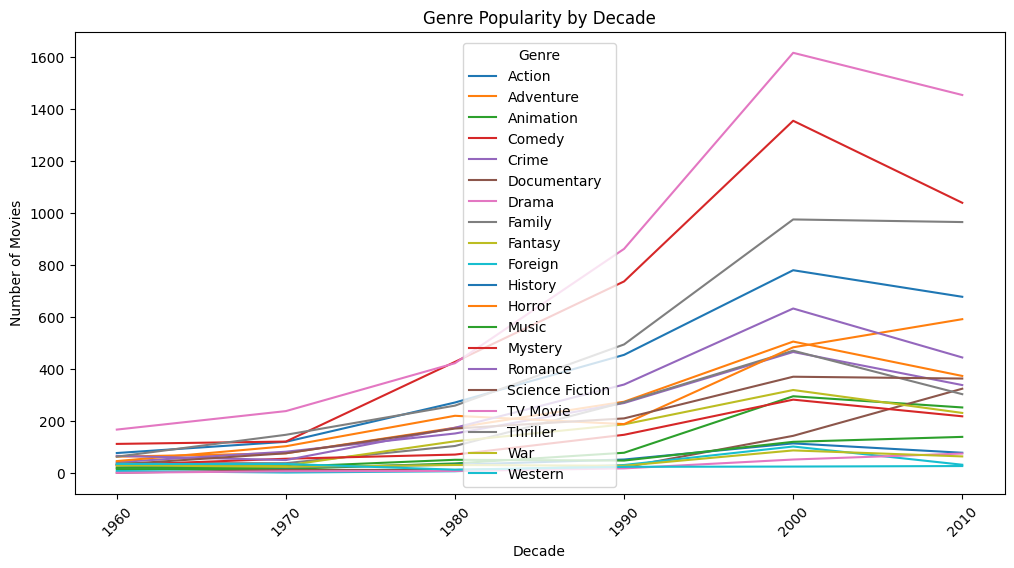

In [1607]:
# Create a line chart showing genre popularity trends
genre_counts_by_decade.pivot(index='decade', columns='genres', values='count').plot(kind='line', figsize=(12, 6))
plt.title('Genre Popularity by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()

**Create a Line Chart:**

A line chart helps visualize the genre popularity trends over time. I used the pivoted DataFrame to create the chart, with decades on the x-axis and the count of movies on the y-axis.

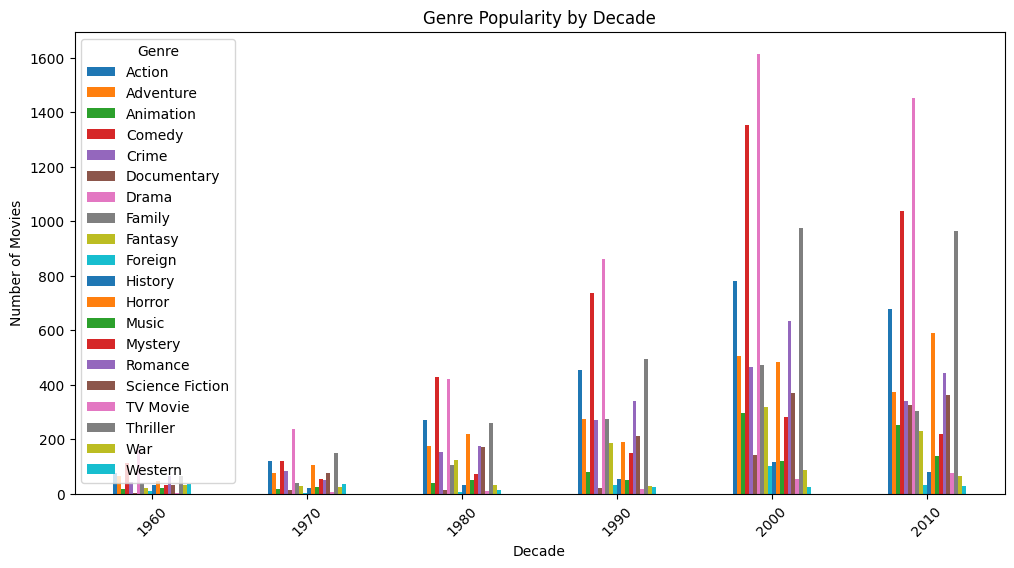

In [1608]:
# Create a bar chart showing genre popularity trends
genre_counts_by_decade.pivot(index='decade', columns='genres', values='count').plot(kind='bar', figsize=(12, 6))
plt.title('Genre Popularity by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.show()

**Create a Bar Chart:**

Alternatively, I created a bar chart to visualize the same data. Bar charts can also effectively showcase genre popularity by decade.


Average Popularity by Genre:
 genres
Adventure          1.154259
Science Fiction    1.001548
Fantasy            0.992840
Action             0.926274
Animation          0.852182
Family             0.786668
Crime              0.744930
Thriller           0.741563
War                0.727683
Mystery            0.690012
Comedy             0.592607
Romance            0.592082
Drama              0.591495
Western            0.590615
History            0.575936
Music              0.487321
Horror             0.465357
TV Movie           0.270896
Foreign            0.191496
Documentary        0.181432
Name: popularity, dtype: float64


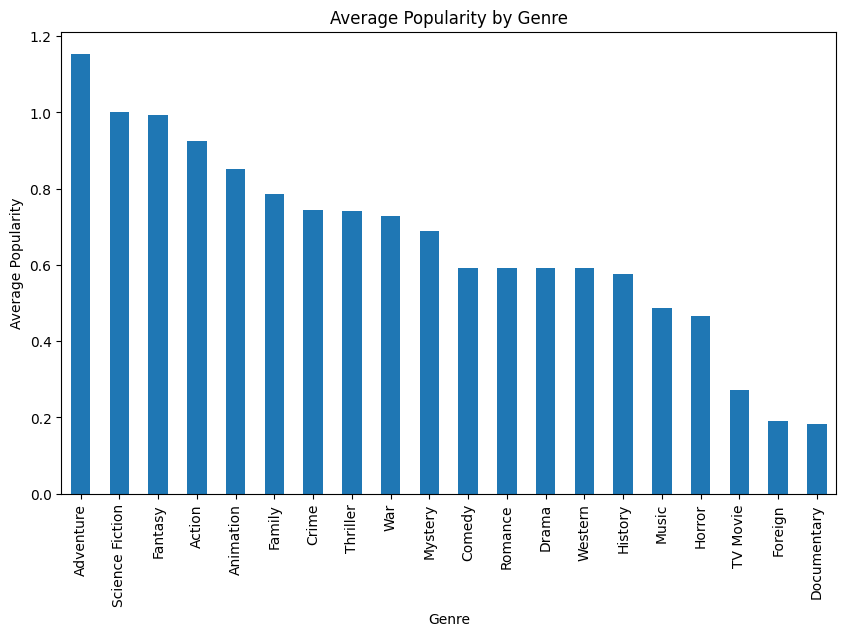

In [1609]:
# Popularity by Genre:
genre_popularity = df_genres.groupby('genres')['popularity'].mean().sort_values(ascending=False)
print("\nAverage Popularity by Genre:\n", genre_popularity) 
genre_popularity.plot(kind='bar', figsize=(10, 6), title='Average Popularity by Genre')
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.show()

**Popularity by Genre:**

I calculated the average popularity score for each genre and then visualized it using a bar chart. This helps me understand which genres tend to be more popular on average.


Average Popularity by Year:
 release_year
1960    0.458932
1961    0.422827
1962    0.454783
1963    0.502706
1964    0.412428
1965    0.342587
1966    0.304112
1967    0.471154
1968    0.484202
1969    0.422778
1970    0.341700
1971    0.448112
1972    0.449054
1973    0.494462
1974    0.447829
1975    0.519445
1976    0.474516
1977    0.626387
1978    0.413314
1979    0.589312
1980    0.495652
1981    0.442413
1982    0.543353
1983    0.541445
1984    0.590843
1985    0.584058
1986    0.509545
1987    0.504637
1988    0.465039
1989    0.563658
1990    0.535735
1991    0.501090
1992    0.582913
1993    0.547056
1994    0.668825
1995    0.710722
1996    0.604768
1997    0.712003
1998    0.626165
1999    0.645799
2000    0.546799
2001    0.702658
2002    0.701454
2003    0.719083
2004    0.722438
2005    0.628663
2006    0.606371
2007    0.593161
2008    0.584817
2009    0.600178
2010    0.645058
2011    0.675069
2012    0.607197
2013    0.627627
2014    0.887268
2015    1.030657
Name:

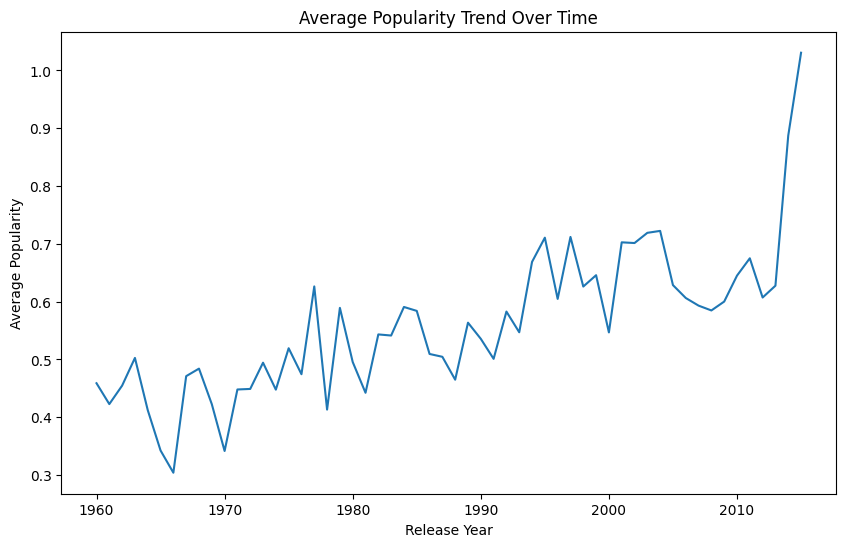

In [1610]:
# Popularity Trends over Time:
popularity_by_year = df.groupby('release_year')['popularity'].mean()
print("\nAverage Popularity by Year:\n", popularity_by_year)

popularity_by_year.plot(kind='line', figsize=(10, 6), title='Average Popularity Trend Over Time')
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.show()

**Popularity Trends over Time:**

I analyzed how average movie popularity has changed over the years. I grouped the original DataFrame by release_year and calculate the mean popularity score for each year. A line chart effectively shows the trend of popularity over time.


Average Popularity by Release Month:
 release_month
1     0.460574
2     0.589931
3     0.642808
4     0.562475
5     0.749997
6     0.800755
7     0.747678
8     0.584363
9     0.564820
10    0.613168
11    0.755466
12    0.750784
Name: popularity, dtype: float64


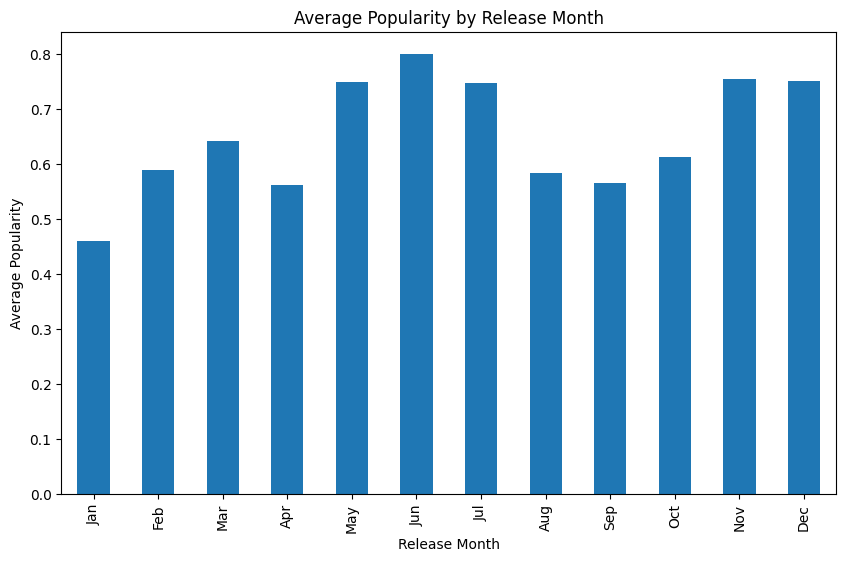

In [1611]:
# Popularity by Month:
popularity_by_month = df.groupby('release_month')['popularity'].mean()
print("\nAverage Popularity by Release Month:\n", popularity_by_month)

popularity_by_month.plot(kind='bar', figsize=(10, 6), title='Average Popularity by Release Month')
plt.xlabel("Release Month")
plt.ylabel("Average Popularity")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

**Popularity by Month:**

I explored whether certain release months are associated with higher popularity. I grouped by release_month and calculate average popularity. A bar chart is suitable for visualizing this monthly comparison.

**Genre Mania:  Unveiling Movie Trends Over the Decades:**

The movie industry is a dynamic landscape, with audience tastes evolving over time. Our analysis of the TMDb dataset reveals fascinating insights into how genre popularity has shifted across the decades, as seen in the visualizations and table.

**Key Trends:**

* **Drama's Enduring Appeal:** Drama consistently claims the top spot across all decades, though it experiences a slight dip in the 2010s. This underscores drama's lasting power to engage audiences with its focus on human stories and complex characters.

* **Comedy's Rise to Prominence:**  Comedy's popularity climbed steadily, reaching a peak in the 2000s. This might reflect a growing preference for lighter fare and escapism. However, a plateau in recent decades suggests a potential saturation of the comedy market.

* **Thrillers Gain Momentum:**  Thrillers have emerged as a dominant force, with a consistent rise in popularity culminating in a peak in the 2010s. This trend might be linked to a societal shift towards darker themes and a desire for more suspenseful narratives.

* **Action/Adventure's Fluctuations:** While a staple of the movie industry, action and adventure films have experienced notable fluctuations, with a significant dip in the 2010s. This could be attributed to audience fatigue with superhero films or changing studio preferences.

* **Horror's Undying Popularity:**  The horror genre has enjoyed consistent growth, indicating a lasting fascination with the macabre.

* **The 2010s Decline:**  The data shows a general decline in movie releases across most genres in the 2010s. This observation raises questions about potential contributing factors, such as:

    * **The Rise of Streaming:**  Did the emergence of streaming services like Netflix and Amazon Prime impact traditional movie production and consumption patterns?
    * **Economic Factors:**  Did the global financial crisis of the late 2000s lead to a decrease in studio investments?
    * **Changing Audience Habits:**  Are audiences increasingly opting for alternative forms of entertainment?

**Popularity Insights:**

* **Adventure Reigns Supreme:**  Adventure movies consistently boast the highest average popularity scores. This might reflect a universal appeal for stories of exploration, excitement, and escape.

* **Sci-Fi and Fantasy Close Behind:** These genres also score high in popularity, potentially driven by immersive worlds, fantastical elements, and the rise of blockbuster franchises.

* **Popularity on the Rise:** The line chart showing average popularity by release year reveals a clear upward trend, indicating that movies, on average, are becoming more popular over time. 

### Average Actor Revenue: Do certain actors consistently appear in higher-grossing movies? Can we identify the most bankable stars?


In [1612]:
# Review the head of the dataset to remind ourselves of its structure
print(df.head(10))
print(df.info())

       id    imdb_id  popularity  budget_millions  revenue_millions  \
0  135397  tt0369610   32.985763            150.0       1513.528810   
1   76341  tt1392190   28.419936            150.0        378.436354   
2  262500  tt2908446   13.112507            110.0        295.238201   
3  140607  tt2488496   11.173104            200.0       2068.178225   
4  168259  tt2820852    9.335014            190.0       1506.249360   
5  281957  tt1663202    9.110700            135.0        532.950503   
6   87101  tt1340138    8.654359            155.0        440.603537   
7  286217  tt3659388    7.667400            108.0        595.380321   
8  211672  tt2293640    7.404165             74.0       1156.730962   
9  150540  tt2096673    6.326804            175.0        853.708609   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   
5       

Before proceeding with the analysis, we examine the first few rows of the dataframe. Notice that the `'cast'` column contains a list of actors for each movie.

In [1613]:
# Create a DataFrame for actor analysis (exploding 'cast')
df_cast = df.copy()  # Create a copy of the original DataFrame

# Explode the 'cast' column to create separate rows for each actor, resetting the index to avoid duplicate movie entries
df_cast = df_cast.explode('cast', ignore_index=True) 

# Remove "Unknown" from the 'cast' column
df_cast = df_cast[df_cast['cast'] != 'Unknown'] 

**Data Cleaning and Setup for Actor Analysis:**

To analyze individual actor revenue, I exploded the `'cast'` column. This created a new row for each actor listed in a movie, replicating the movie's information (including revenue). `ignore_index=True`: This argument tells Pandas to create a new, sequential index (0, 1, 2, ...) for the exploded DataFrame, preventing the original index from being duplicated.

After exploding the 'cast' column, we filter out rows where `cast == 'Unknown'`.

In [1614]:
# Review the head of the dataset after exploding the `'cast'` column.
print(df_cast.head(20))
print(df_cast.info())

        id    imdb_id  popularity  budget_millions  revenue_millions  \
0   135397  tt0369610   32.985763            150.0       1513.528810   
1   135397  tt0369610   32.985763            150.0       1513.528810   
2   135397  tt0369610   32.985763            150.0       1513.528810   
3   135397  tt0369610   32.985763            150.0       1513.528810   
4   135397  tt0369610   32.985763            150.0       1513.528810   
5    76341  tt1392190   28.419936            150.0        378.436354   
6    76341  tt1392190   28.419936            150.0        378.436354   
7    76341  tt1392190   28.419936            150.0        378.436354   
8    76341  tt1392190   28.419936            150.0        378.436354   
9    76341  tt1392190   28.419936            150.0        378.436354   
10  262500  tt2908446   13.112507            110.0        295.238201   
11  262500  tt2908446   13.112507            110.0        295.238201   
12  262500  tt2908446   13.112507            110.0        295.23

In [1615]:
# Group by 'cast' and calculate the mean adjusted revenue for each actor
actor_avg_revenue = df_cast.groupby('cast')['revenue_adj_millions'].mean().sort_values(ascending=False)

**Group by `'cast'` and Calculate the Mean:**

After exploding the DataFrame, I use `.groupby('cast')` to group the data by actor. Then, I applied `.mean()` to calculate the average `'revenue_adj_millions'` for each actor. This gives me a measure of the average box office success associated with each actor. I used `.sort_values(ascending=False)` to sort the result in descending order, showing the highest-earning actors first.

cast
Daisy Ridley             1902.723130
Robert MacNaughton       1791.694309
Betty Lou Gerson         1574.814740
Martha Wentworth         1574.814740
J. Pat O'Malley          1574.814740
Ben Wright               1574.814740
Bob Peck                 1388.863312
Louis Prima              1345.551059
Richard S. Castellano    1277.913732
Santino Fontana          1192.711491
Peggy Wood               1129.534862
Richard Haydn            1129.534862
Eleanor Parker           1129.534862
Jason Miller             1116.226208
FranÃ§ois Truffaut       1092.964989
Rik Van Nutter            977.153544
Claudine Auger            977.153544
Luciana Paluzzi           977.153544
Adolfo Celi               977.153544
Anthony Daniels           907.467277
Name: revenue_adj_millions, dtype: float64


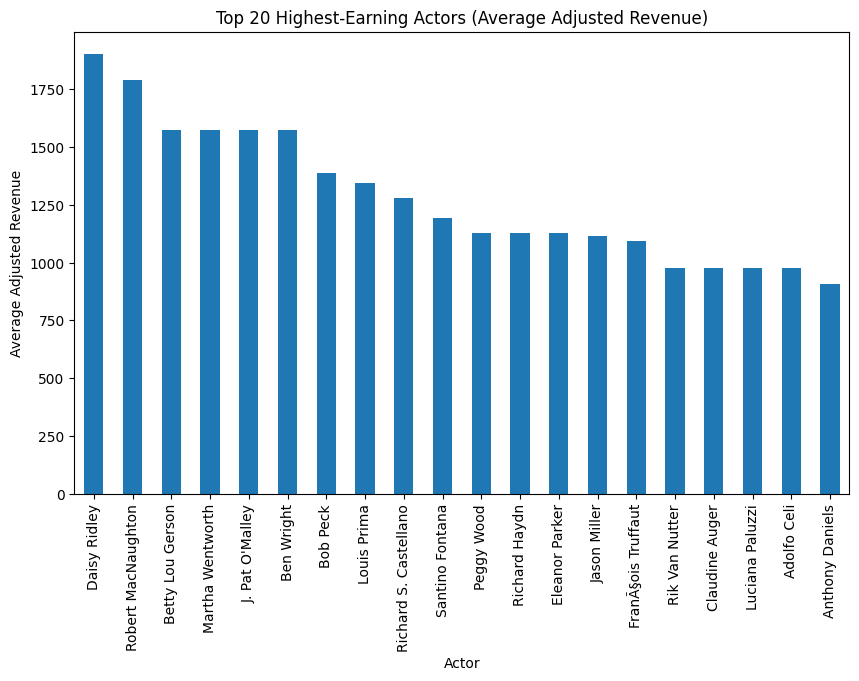

In [1616]:
# Print the top 20 highest-earning actors
print(actor_avg_revenue.head(20))

# Create a bar chart of the top 20 highest-earning actors
actor_avg_revenue.head(20).plot(kind='bar', figsize=(10,6), title='Top 20 Highest-Earning Actors (Average Adjusted Revenue)')
plt.xlabel("Actor")
plt.ylabel("Average Adjusted Revenue")
plt.show()

**Most Successful Actors Based on Average Revenue:**

To get a quick overview of the most successful actors, we print the top 20 actors based on average revenue. We also create a bar chart of the top 20 actors, allowing us to quickly visualize which actors have the highest average box office performance.

Calculating the average revenue across all years might give a misleading picture, especially for actors with long careers spanning multiple decades or for actors with shorter careers that where in a blockbuster hit.  Let's find the top 20 highest-earning actors by decade.

In [1617]:
# Group by 'decade' and 'cast', calculate average revenue and movie count
decade_actor_data = df_cast.groupby(['decade', 'cast'])['revenue_adj_millions'].agg(['mean', 'count']).reset_index()
decade_actor_data.rename(columns={'mean': 'avg_revenue', 'count': 'movie_count'}, inplace=True)

# Create a loop to find and display the top 20 actors for each decade
for decade in decade_actor_data['decade'].unique(): # Use decade_actor_data instead of decade_actor_revenue
    print(f"--- Top 20 Actors in {decade} ---")
    
    # Rename the 'mean' column to 'avg_revenue' BEFORE sorting
    top_actors_decade = decade_actor_data[decade_actor_data['decade'] == decade].sort_values(by='avg_revenue', ascending=False).head(20)
    
    # Format revenue for readability (e.g., in millions) - Do this AFTER sorting!
    top_actors_decade['avg_revenue'] = top_actors_decade['avg_revenue'].apply(lambda x: f"{x:.2f} million")

    print(top_actors_decade)
    print("\n")

--- Top 20 Actors in 1960 ---
      decade               cast      avg_revenue  movie_count
432     1960    J. Pat O'Malley  1574.81 million            1
681     1960   Martha Wentworth  1574.81 million            1
91      1960   Betty Lou Gerson  1574.81 million            1
83      1960         Ben Wright  1574.81 million            1
847     1960        Phil Harris  1345.55 million            1
647     1960        Louis Prima  1345.55 million            1
828     1960         Peggy Wood  1129.53 million            1
879     1960      Richard Haydn  1129.53 million            1
278     1960     Eleanor Parker  1129.53 million            1
651     1960    Luciana Paluzzi   977.15 million            1
180     1960     Claudine Auger   977.15 million            1
1       1960        Adolfo Celi   977.15 million            1
886     1960     Rik Van Nutter   977.15 million            1
404     1960     Honor Blackman   878.08 million            1
1016    1960       Tania Mallet   878.08

**Analyzing Actor Revenue by Decade:**

To gain insights into which actors are associated with high-grossing films, I'll calculate the average adjusted revenue generated by movies featuring each actor, broken down by decade. This approach helps me identify actors who consistently appear in financially successful films over different time periods.

1. **Group, Calculate, and Rename:** I grouped the exploded `df_cast` DataFrame by `decade` and `cast`, then use `.agg()` to calculate the mean adjusted revenue (`'avg_revenue'`) and the number of movies (`'movie_count'`) for each actor in each decade.

2. **Loop Through Decades:** I iterate through the unique decades in the dataset using a `for` loop.

3. **Identify Top Actors:**  For each decade, I filtered the DataFrame to include only movies from that decade, sort by `avg_revenue` (highest to lowest), and select the top 20 actors.

4. **Format and Display:** I format the `avg_revenue` column to display values in millions for readability. The code then prints the top 20 actors and their average revenue for each decade.

**A threshold for the minimum number of movies is needed...Why?:** 

* **Skewed Averages:** An actor who appeared in only one or two high-grossing films in a particular decade might have a very high average revenue, even if their overall career isn't as successful.
* **Focus on Established Careers:** By setting a minimum movie count (e.g., 5 movies per decade), we can focus on actors with more established careers and identify those who consistently deliver box office success.


In [1618]:
# Calculate the number of movies each actor has been in
actor_movie_count = df_cast['cast'].value_counts()
print(actor_movie_count.head(50))

cast
Robert De Niro           72
Samuel L. Jackson        71
Bruce Willis             62
Nicolas Cage             61
Michael Caine            53
Robin Williams           51
John Cusack              50
John Goodman             49
Morgan Freeman           49
Liam Neeson              48
Susan Sarandon           48
Julianne Moore           47
Alec Baldwin             47
Tom Hanks                46
Gene Hackman             46
Johnny Depp              46
Christopher Walken       46
Dennis Quaid             45
Sylvester Stallone       45
Willem Dafoe             45
Ed Harris                44
Clint Eastwood           44
Meryl Streep             44
Donald Sutherland        44
Antonio Banderas         43
Woody Harrelson          43
Robert Downey Jr.        43
Ewan McGregor            43
Keanu Reeves             43
Harrison Ford            42
Eddie Murphy             42
Danny Glover             42
Nicole Kidman            42
Anthony Hopkins          42
Steve Buscemi            41
Al Pacino      

**Number of Movies:**

To get a sense of the actors' experience, I calculated how many movies each actor has appeared in using `value_counts()` on the 'cast' column.

In [1619]:
# Filter actors with at least 5 movies in a decade
min_movies = 5
filtered_actor_data = decade_actor_data[decade_actor_data.groupby('cast')['cast'].transform('size') >= min_movies]

# Loop through decades and display top 20 actors
for decade in filtered_actor_data['decade'].unique():
    print(f"--- Top 20 Actors in {decade} ---")
    
    # Get the top 20 actors for the decade
    top_actors_decade = filtered_actor_data[filtered_actor_data['decade'] == decade].sort_values(by='avg_revenue', ascending=False).head(20)
    
    # Format revenue for readability
    top_actors_decade['avg_revenue'] = top_actors_decade['avg_revenue'].apply(lambda x: f"{x:.2f} million")

    print(top_actors_decade)
    print("\n")

--- Top 20 Actors in 1960 ---
      decade                 cast     avg_revenue  movie_count
171     1960  Christopher Plummer  586.75 million            2
951     1960         Sean Connery  524.17 million            7
258     1960       Dustin Hoffman  474.32 million            2
684     1960        Martin Landau  411.19 million            1
565     1960        Julie Andrews  404.76 million            5
42      1960        Anne Bancroft  350.22 million            2
566     1960       Julie Christie  287.03 million            3
549     1960           Jon Voight  266.21 million            1
450     1960    Jacqueline Bisset  265.18 million            1
727     1960         Michael York  243.87 million            1
708     1960           Mia Farrow  209.35 million            1
52      1960        Anthony Quinn  200.83 million            4
297     1960         Faye Dunaway  187.69 million            2
1077    1960        Warren Beatty  187.69 million            2
331     1960         Gene

**Focusing on Established Actors:**

To ensure my analysis of actor revenue focuses on actors with more substantial careers and avoids being skewed by actors who have only appeared in a few films, I applied a filtering step.

1. **Filter by Movie Count:** I set a threshold (`min_movies = 5`) and filter our `decade_actor_data` DataFrame to include only actors who have starred in at least five movies within each decade.

2. **Loop Through Decades:** I iterated through the unique decades in the dataset using a `for` loop.

3. **Sort and Select Top Actors:**  For each decade, I identified the top 20 actors with the highest average revenue.

4. **Format and Display:** I formated the `avg_revenue` column to display values in millions for readability. The code then prints the top 20 actors and their average revenue for each decade , along with their average adjusted revenue and the number of movies they appeared in.

--- Top 20 Actors in 1960 ---


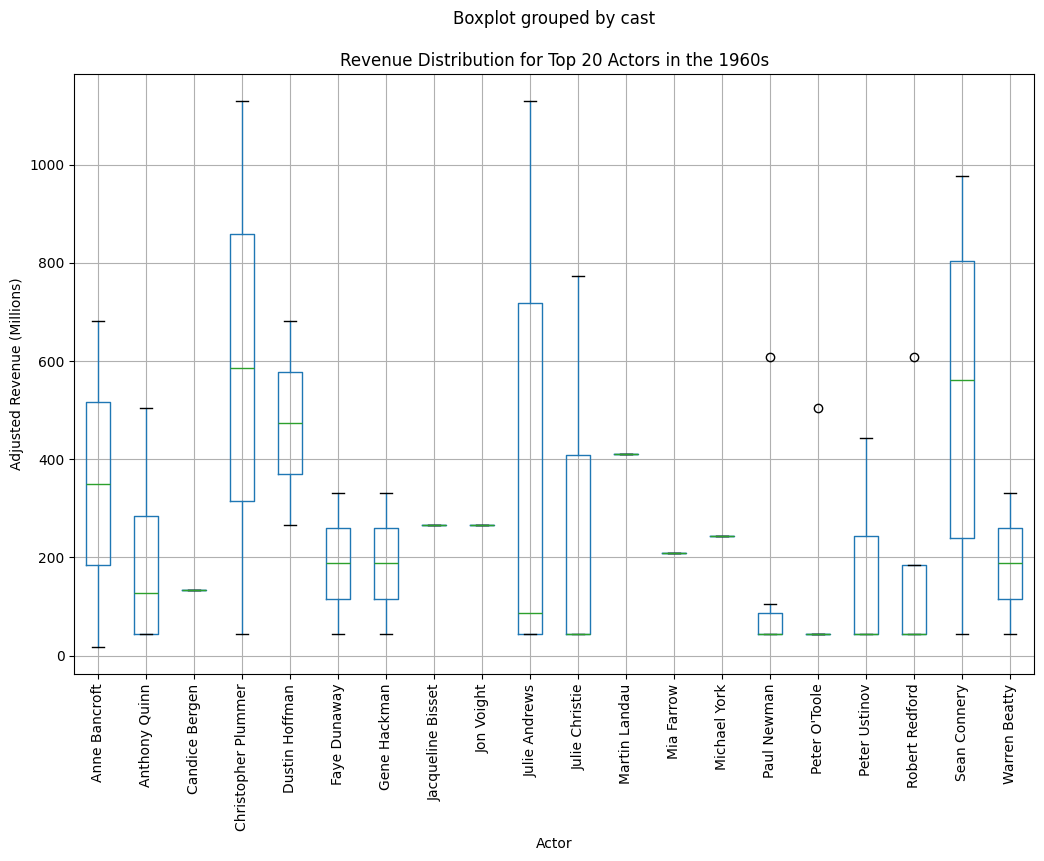

--- Top 20 Actors in 1970 ---


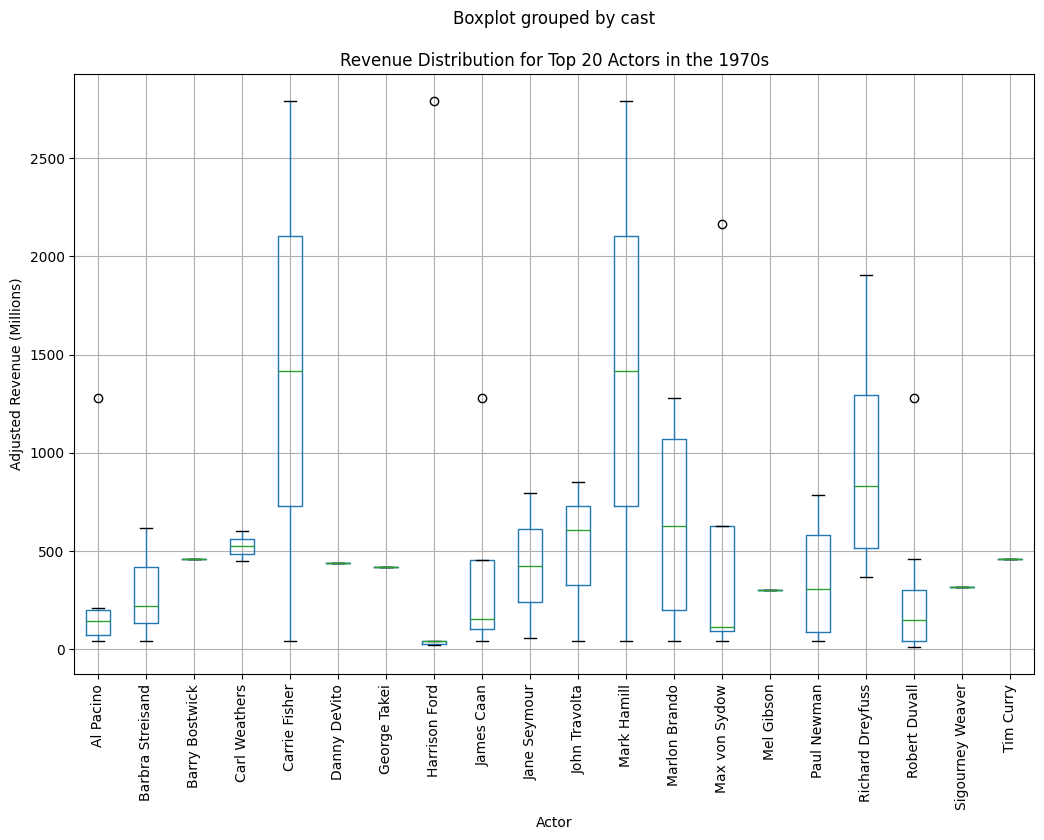

--- Top 20 Actors in 1980 ---


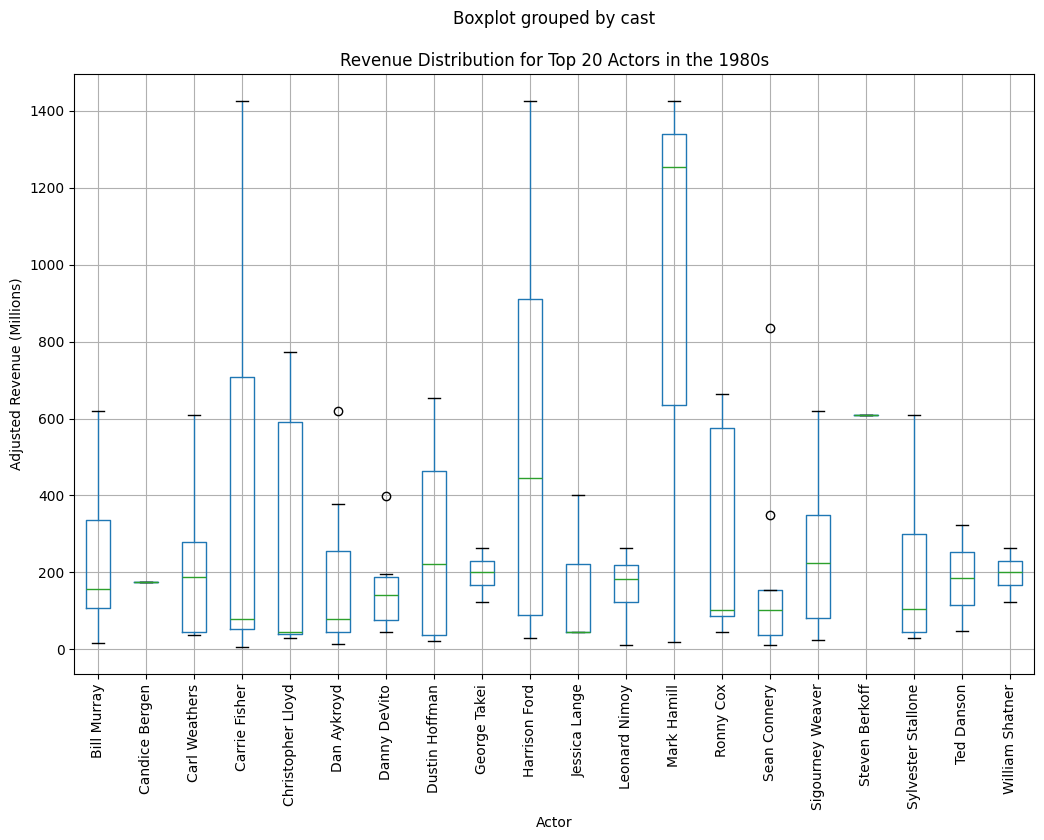

--- Top 20 Actors in 1990 ---


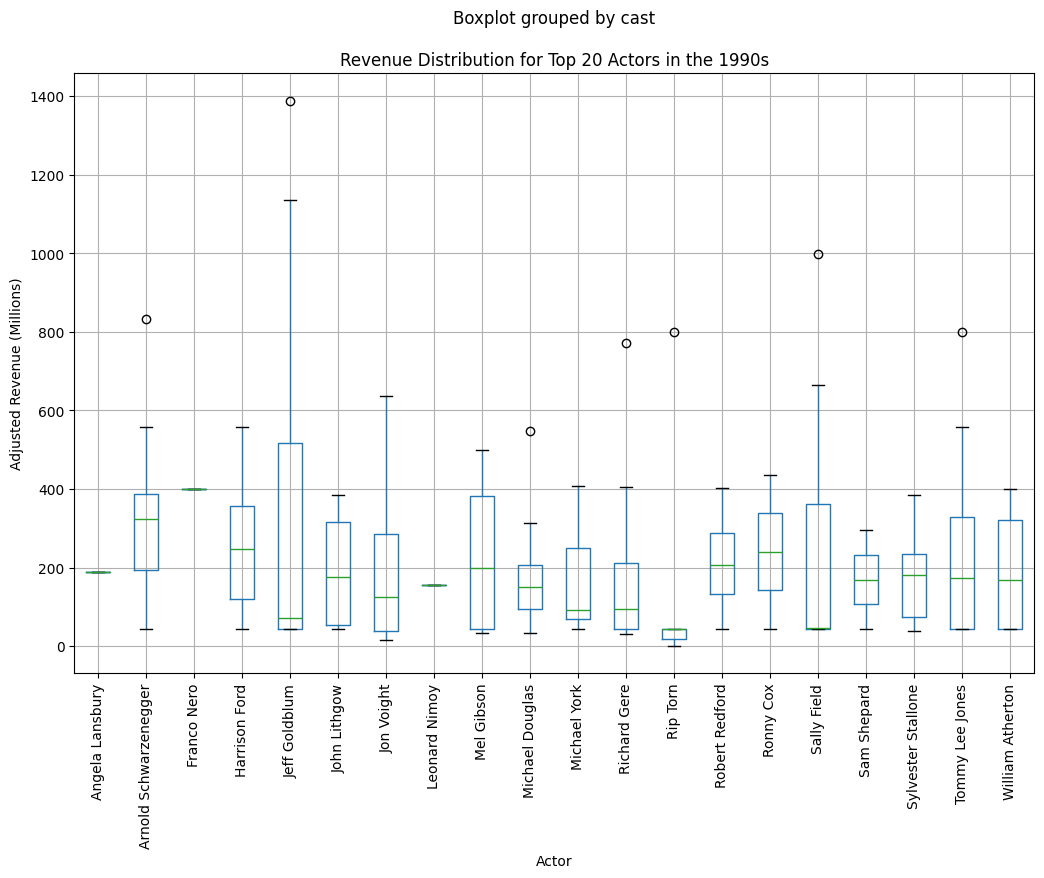

--- Top 20 Actors in 2000 ---


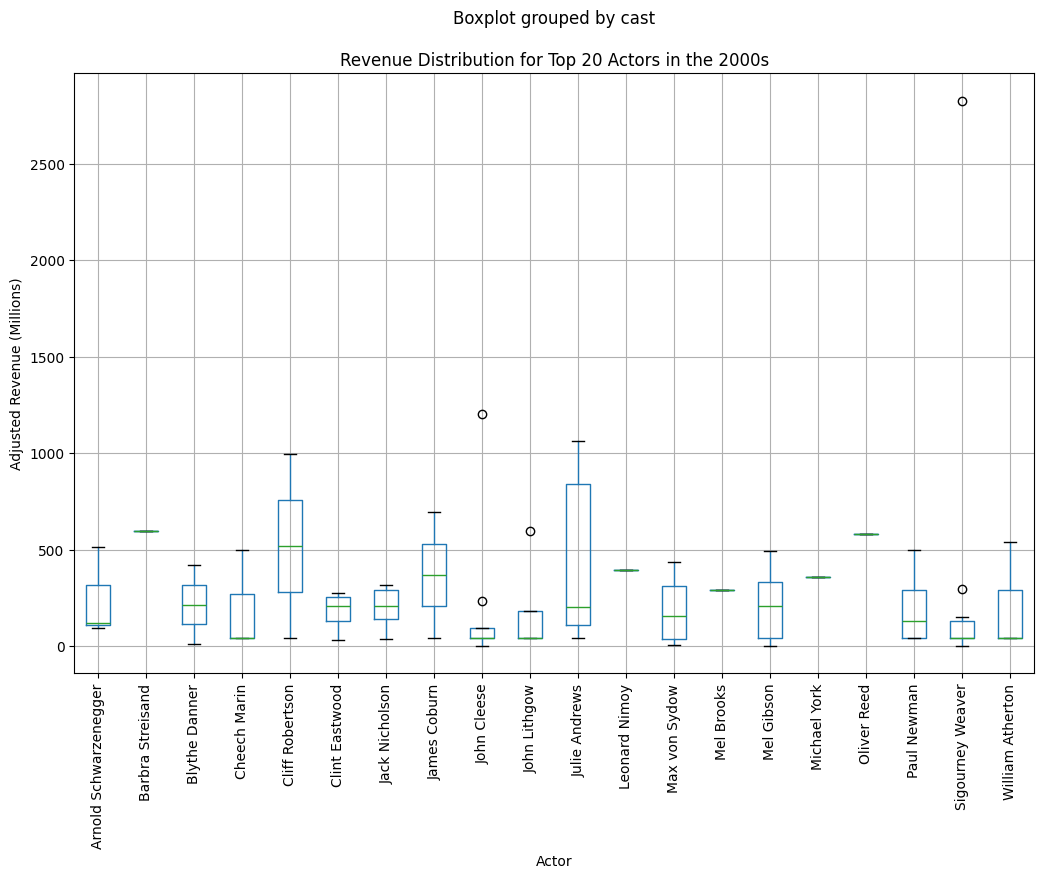

--- Top 20 Actors in 2010 ---


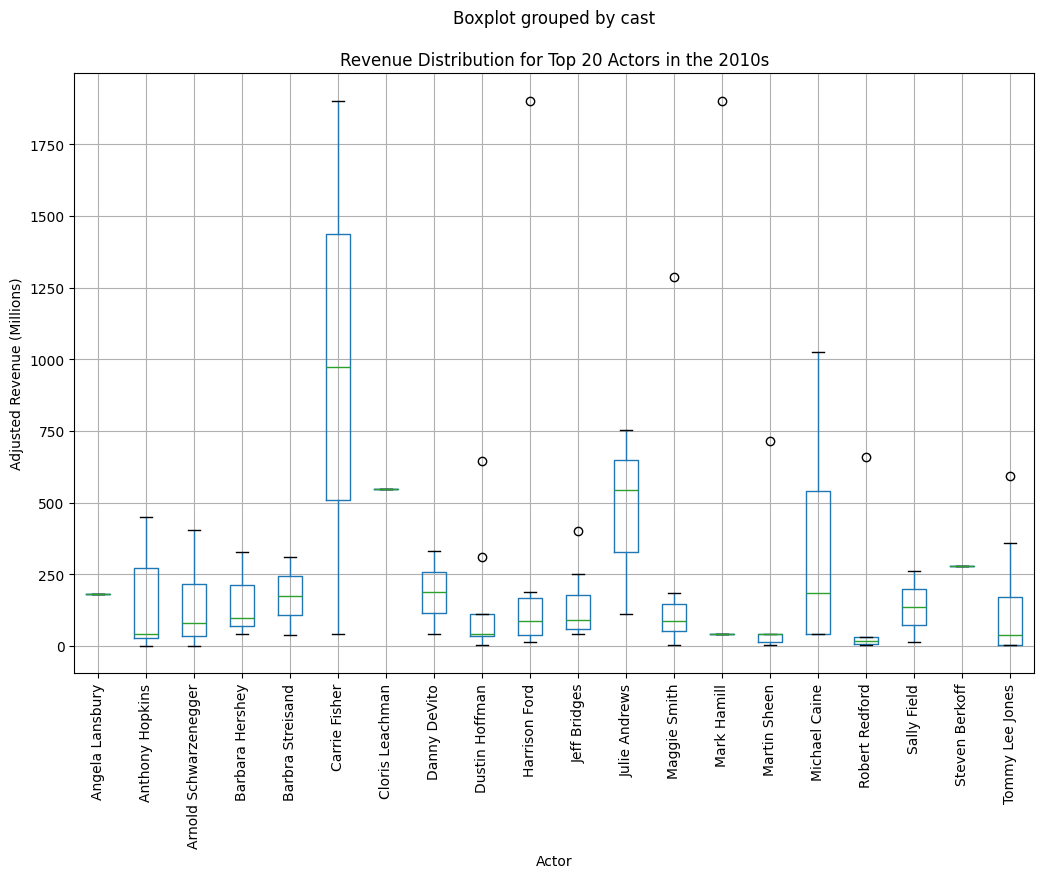

In [1620]:
# Loop through decades and create box plots for top actors
for decade in filtered_actor_data['decade'].unique():
    # Get the top 20 actors for the current decade
    print(f"--- Top 20 Actors in {decade} ---")
    top_actors_decade = filtered_actor_data[filtered_actor_data['decade'] == decade].sort_values(by='avg_revenue', ascending=False).head(20)['cast']
    
    # Filter the DataFrame for movies with those actors in that decade
    df_decade_actors = df_cast[(df_cast['cast'].isin(top_actors_decade)) & (df_cast['decade'] == decade)]
    
    # Create the box plot
    df_decade_actors.boxplot(column='revenue_adj_millions', by='cast', figsize=(12, 8), rot=90)
    plt.title(f"Revenue Distribution for Top 20 Actors in the {decade}s")
    plt.xlabel("Actor")
    plt.ylabel("Adjusted Revenue (Millions)")
    plt.show()

**Visualizing Revenue Distribution for Top Actors:** 

To further explore the financial success of the top actors in each decade, I created box plots that show the distribution of their movie revenues. This visualization can reveal insights into the consistency of their box office performance and identify any outliers or extreme values. 

1.  **Iterate through Decades:** I looped through each unique decade in our filtered dataset.
2. **Identify Top Actors:** For each decade, we select the top 20 highest-earning actors based on average adjusted revenue, storing their names in the `top_actors_decade` Series.
3. **Filter by Decade and Actors:** I created a temporary DataFrame, `df_decade_actors`, by filtering the `df_cast` DataFrame to include only movies:
     - Starring actors in the `top_actors_decade` list.
     - Released in the current decade.
4. **Generate Box Plots:** I created a box plot using the `boxplot()` method on the filtered DataFrame. This visualization shows the distribution of adjusted revenue for the top actors in that decade, allowing us to see:
      - The median revenue (the line inside the box).
      - The interquartile range (IQR), which represents the middle 50% of the data (the box itself).
     - The whiskers, which extend to the minimum and maximum values within a certain range (typically 1.5 times the IQR).
      - Outliers, which are data points that fall outside the whiskers.

In [1621]:
# Loop through decades
for decade in filtered_actor_data['decade'].unique():
    print(f"--- Top 20 Actors in {decade} ---")

    # Get the top 20 actors for the decade
    top_actors_decade = filtered_actor_data[filtered_actor_data['decade'] == decade].sort_values(by='avg_revenue', ascending=False).head(20)['cast']

    # Create a list to store movie data (actor, movie, revenue)
    movie_data = []

    # Iterate through the top actors
    for actor in top_actors_decade:
        # Get the movies and revenue associated with the actor in the current decade
        movies = df_cast[(df_cast['cast'] == actor) & (df_cast['decade'] == decade)][['original_title', 'revenue_adj_millions']]
        
        # Iterate through the movies and append the data to the list
        for index, row in movies.iterrows():
            movie_data.append({
                'actor': actor, 
                'movie': row['original_title'], 
                'revenue': f"{row['revenue_adj_millions']:.2f} million"  # Revenue in millions
            })

    # Create a DataFrame from the movie_data list
    movies_df = pd.DataFrame(movie_data)
    print(movies_df)
    
    # Save the DataFrame to a CSV file named according to the decade
    movies_df.to_csv(f'top_actors_movies_{decade}.csv', index=False)
    print(f"Data for {decade} saved to CSV.\n")

--- Top 20 Actors in 1960 ---
                  actor                               movie          revenue
0   Christopher Plummer           The Night of the Generals    43.96 million
1   Christopher Plummer                  The Sound of Music  1129.53 million
2          Sean Connery                              Dr. No   429.62 million
3          Sean Connery                          Goldfinger   878.08 million
4          Sean Connery                              Marnie    49.21 million
5          Sean Connery                 You Only Live Twice   729.40 million
6          Sean Connery               From Russia With Love   561.77 million
7          Sean Connery                         Thunderball   977.15 million
8          Sean Connery                            The Hill    43.96 million
9        Dustin Hoffman                        The Graduate   682.42 million
10       Dustin Hoffman                     Midnight Cowboy   266.21 million
11        Martin Landau                       

**Identifying Franchise Influence on Actor Revenue:**  

To determine if certain actors' high average revenues are driven by their participation in specific film franchises, we'll examine the individual movies associated with the top 20 highest-earning actors in each decade.

1. **Group, Calculate, and Filter:** I started by grouping our data by decade and actor, calculating the average revenue, counting the movies per actor, and filtering to include only actors who have starred in at least five movies within a decade. 

2. **Create a `movie_data` List:** For each decade, I created a list to store dictionaries, each representing a movie with its associated actor and revenue.

3. **Iterate Through Top Actors and Movies:**  I looped through the top 20 actors in each decade. For every actor, we:
     - Filter the `df_cast` DataFrame to select movies in which the actor appeared *during that specific decade*.
     -  Extract the movie title and adjusted revenue for each movie. 
     - Create a dictionary for each movie, containing the actor's name, movie title, and adjusted revenue (formatted in millions for readability).
     - Append each movie's dictionary to the `movie_data` list. 

4. **Create and Save DataFrames:** I created a Pandas DataFrame (`movies_df`) from the `movie_data` list for each decade.  This DataFrame is then saved to a CSV file named according to the decade (e.g., `top_actors_movies_1970.csv`).  

**Do certain actors consistently appear in higher-grossing movies? Can we identify the most "bankable" stars?** 

My initial exploration of actor revenue, broken down by decade, suggests that consistently high earnings are often tied to roles in successful film franchises, making it difficult to isolate individual star power.  

* **Early Decades (1960s-1970s):**  These decades showcase a clearer link between individual actors and high revenue. Actors like Sean Connery and Julie Andrews, driven by iconic roles in successful franchises ("James Bond," "Mary Poppins," "The Sound of Music"), stand out with consistently high average revenues.

* **Shifting Landscape (1980s-1990s):**  We see more variability in actor revenue as blockbuster franchises become more prominent. While some actors maintain high average earnings, the data reveals a greater mix of hits and misses, suggesting that even established stars don't always guarantee box office success.

* **Franchise Dominance (2000s-2010s):**  The rise of blockbuster franchises significantly skews the average revenue figures. Actors appearing in these films often dominate the top spots, making it challenging to isolate individual star power from franchise success.


* **Franchise Power:**

The dominance of franchises in recent decades makes it difficult to separate an actor's individual draw from the success of the franchise itself. For example, Daisy Ridley's high average revenue is almost entirely due to her role in "Star Wars: The Force Awakens."

### Production Company Success: Do certain production companies have a higher average revenue or popularity score for their films? Are there specific production companies that dominate certain genres?

In [1622]:
# Review the head of the dataset to remind ourselves of its structure
print(df.head(10))
print(df.info())

       id    imdb_id  popularity  budget_millions  revenue_millions  \
0  135397  tt0369610   32.985763            150.0       1513.528810   
1   76341  tt1392190   28.419936            150.0        378.436354   
2  262500  tt2908446   13.112507            110.0        295.238201   
3  140607  tt2488496   11.173104            200.0       2068.178225   
4  168259  tt2820852    9.335014            190.0       1506.249360   
5  281957  tt1663202    9.110700            135.0        532.950503   
6   87101  tt1340138    8.654359            155.0        440.603537   
7  286217  tt3659388    7.667400            108.0        595.380321   
8  211672  tt2293640    7.404165             74.0       1156.730962   
9  150540  tt2096673    6.326804            175.0        853.708609   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   
5       

In [1623]:
# Create a DataFrame for production company analysis (exploding 'production_companies')
df_prod_companies = df.copy()
df_prod_companies = df_prod_companies.explode('production_companies', ignore_index=True)

# Remove rows with "Unknown" production companies
df_prod_companies = df_prod_companies[df_prod_companies['production_companies'] != 'Unknown']

**Preparing the Production Company DataFrame:**

To investigate the success of different production companies, I needed to analyze their average revenue and popularity scores. Since a movie can be associated with multiple production companies, I'll transform our data to ensure each production company has its own row.

1. **Create a Separate DataFrame:** I created a copy of the original DataFrame, df_prod_companies, specifically for this analysis to avoid modifying the original data.
2. **Explode the 'production_companies' Column:** I used explode() to create a new row for each production company listed in a movie, replicating the movie's data across those rows. This ensures that I can accurately calculate average revenue and popularity for each production company.
3. **Remove "Unknown" Entries:** I filtered out rows where the production company is labeled as "Unknown," as these entries don't provide meaningful information for our analysis.

In [1624]:
print(df_prod_companies.head(10))
print(df_prod_companies.info())

       id    imdb_id  popularity  budget_millions  revenue_millions  \
0  135397  tt0369610   32.985763            150.0       1513.528810   
1  135397  tt0369610   32.985763            150.0       1513.528810   
2  135397  tt0369610   32.985763            150.0       1513.528810   
3  135397  tt0369610   32.985763            150.0       1513.528810   
4  135397  tt0369610   32.985763            150.0       1513.528810   
5   76341  tt1392190   28.419936            150.0        378.436354   
6   76341  tt1392190   28.419936            150.0        378.436354   
7  262500  tt2908446   13.112507            110.0        295.238201   
8  262500  tt2908446   13.112507            110.0        295.238201   
9  262500  tt2908446   13.112507            110.0        295.238201   

       original_title                                               cast  \
0      Jurassic World  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   
1      Jurassic World  [Chris Pratt, Bryce Dallas Howard, Irrfan K

In [1625]:
# Calculate the number of movies produced by each company BEFORE exploding 'genres'
movie_counts = df_prod_companies['production_companies'].value_counts()
movie_counts_df = pd.DataFrame({'movie_count': movie_counts}) 

# Group by production company and calculate average revenue and popularity
prod_company_performance = df_prod_companies.groupby('production_companies').agg(
    avg_revenue=('revenue_adj_millions', 'mean'),
    avg_popularity=('popularity', 'mean')
).sort_values(by='avg_revenue', ascending=False)

**Calculating Average Revenue and Popularity:**

1. I calculated the average adjusted revenue (`avg_revenue`) and average popularity (`avg_popularity`) for each production company.
2. It's crucial to calculate `movie_counts` before exploding the 'genres' column to avoid inflated counts due to multiple genres per movie. I used these movie counts later.
3. The data is grouped by `production_companies` and the `mean()` function is used to calculate the average for the specified columns.
4. I then sort the results by `avg_revenue` in descending order, so I can easily identify the highest-earning companies.

In [1626]:
# Format avg_popularity for readability
prod_company_performance['avg_popularity'] = prod_company_performance['avg_popularity'].apply(lambda x: f"{x:.2f}") 

# Rename the index to 'production_company'
prod_company_performance.index.name = 'production_company'

**Formatting and Preparing for the Join:**

Before joining our data, I formated the `avg_popularity` column for better readability by rounding to two decimal places. Additionally, I renamed the index of the `prod_company_performance` DataFrame to `'production_company'`. This sets me up for a seamless join with the `movie_counts_df`, which I will create next.

In [1627]:
# Join DataFrames to include movie counts
prod_company_analysis = prod_company_performance.join(movie_counts_df, how='inner')

# Display the top 20 companies by average revenue, along with movie counts
print(prod_company_analysis.head(20)) 

                                                 avg_revenue avg_popularity  \
Hoya Productions                                 2167.324901           2.01   
Truenorth Productions                            1902.723130          11.17   
Alfran Productions                               1277.913732           5.74   
Julia Phillips and Michael Phillips Productions  1092.964989           1.10   
Second Mate Productions                          1081.672430           4.59   
MIRACLE Productions GmbH & Co. KG                1062.775601           6.01   
Disney Enterprises                               1024.886690           3.44   
Patalex IV Productions Limited                   1000.352539           5.94   
Lightstorm Entertainment                          989.935078           3.14   
Cool Music                                        986.688860           4.88   
Harry Potter Publishing Rights                    986.688860           4.88   
P of A Productions Limited                        91

**Joining Data and Displaying Top Companies:**

I now joined the `prod_company_performance` DataFrame with the `movie_counts_df` (containing movie counts per company) using the `join()` method. I specified an `inner` join to ensure that only companies present in both DataFrames are included in the result. Finally, I displayed the top 20 production companies based on average revenue, along with their corresponding movie counts.

In [1628]:
# Now explode the 'genres' column for genre analysis
df_prod_companies = df_prod_companies.explode('genres', ignore_index=True)
df_prod_companies = df_prod_companies[df_prod_companies['genres'] != 'Unknown']

**Preparing for Genre Analysis:**

I am now going to analyze the relationship between production companies and genre. I exploded the `genres` column within the `df_prod_companies` DataFrame. This ensures each genre associated with a movie is listed on a separate row. I also filtered out rows where the genre is 'Unknown.' This transformation allows for an in-depth exploration of genre preferences among production companies.

In [1629]:
# Group by production company and genre, then count movies
genre_counts = df_prod_companies.groupby(['production_companies', 'genres'])['id'].count().reset_index(name='movie_count')

# Pivot for genre breakdown (companies as rows, genres as columns)
genre_pivot = genre_counts.pivot(index='production_companies', columns='genres', values='movie_count').fillna(0).astype(int)

**Creating the Genre Breakdown Table:**

To analyze genre dominance, I grouped the exploded `df_prod_companies` DataFrame (where each row represents a unique movie, production company, and genre) by `production_companies` and `genres`. I counted the number of movies in each group to create a table showing how many movies each production company has made in each genre. I then pivoted the table for readability, so the production companies become the rows, the genres become the columns, and the cell values are the movie counts.

In [1630]:
# Select only the top 20 production companies for genre analysis
top_20_companies = prod_company_analysis.head(20).index
genre_pivot_top20 = genre_pivot.loc[top_20_companies]

# Display the genre breakdown for the top 20 companies
print("\nGenre Counts for Top 20 Production Companies:")
print(genre_pivot_top20)


Genre Counts for Top 20 Production Companies:
genres                                           Action  Adventure  Animation  \
Hoya Productions                                      0          0          0   
Truenorth Productions                                 1          1          0   
Alfran Productions                                    0          0          0   
Julia Phillips and Michael Phillips Productions       0          0          0   
Second Mate Productions                               2          2          0   
MIRACLE Productions GmbH & Co. KG                     0          1          0   
Disney Enterprises                                    0          0          1   
Patalex IV Productions Limited                        0          1          0   
Lightstorm Entertainment                              4          2          0   
Cool Music                                            0          1          0   
Harry Potter Publishing Rights                        0       

**Selecting the Top 20 Companies and Displaying Results:**

I focused my genre analysis on the top 20 highest-earning production companies. I retrieved the names of these companies from the `prod_company_analysis` DataFrame and use them to select the corresponding rows from the pivoted genre breakdown table (`genre_pivot`). The result is a table showing the genre distribution for these top companies.

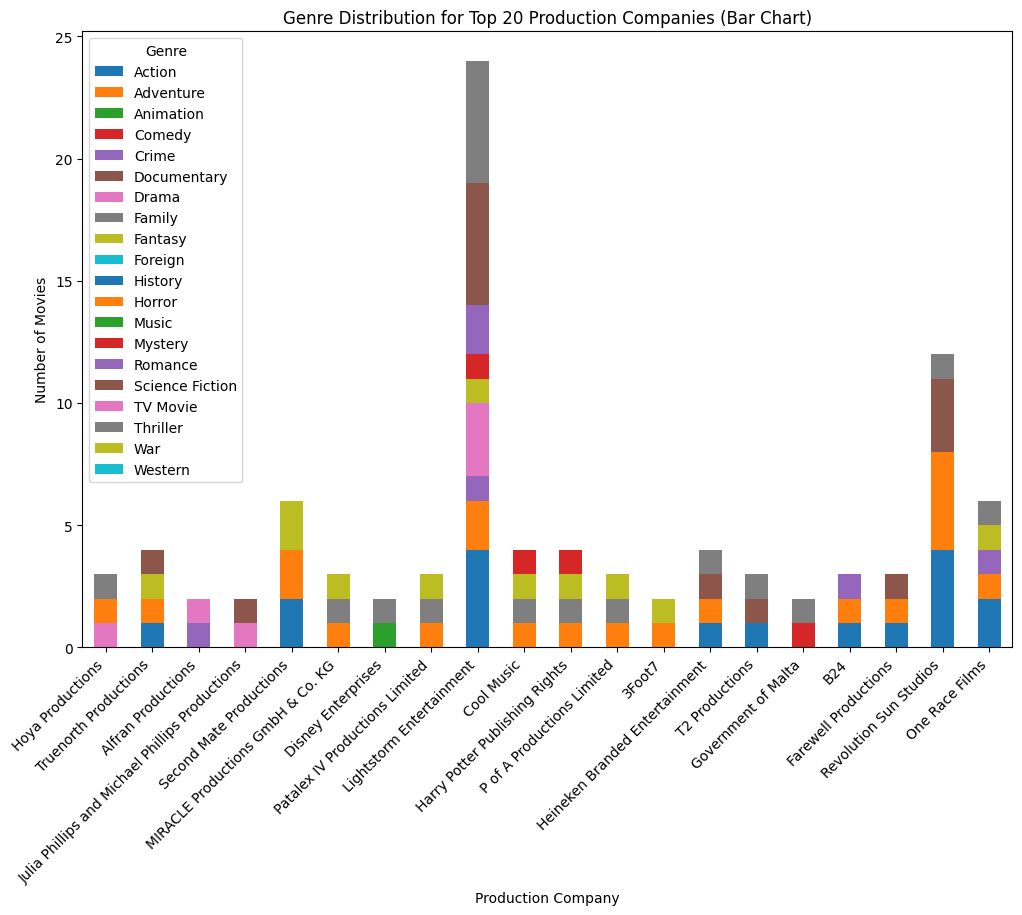

In [1631]:
# Create a bar chart for genre distribution
genre_pivot_top20.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Genre Distribution for Top 20 Production Companies (Bar Chart)')
plt.xlabel('Production Company')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Genre')
plt.show()

**Visualizing Genre Distribution with a Bar Chart:**

I visualized the genre breakdown for the top 20 production companies using a stacked bar chart. Each bar represents a company, and the segments within the bar show the proportion of movies belonging to each genre.

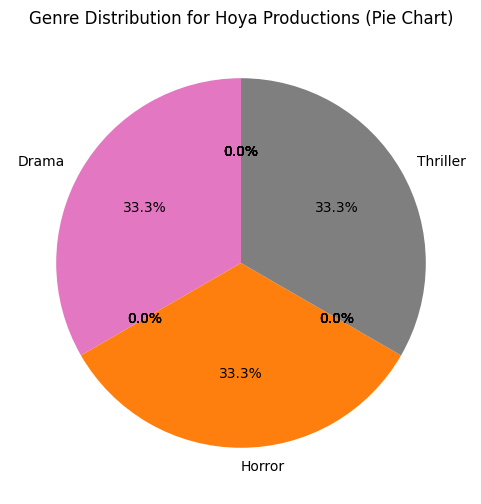

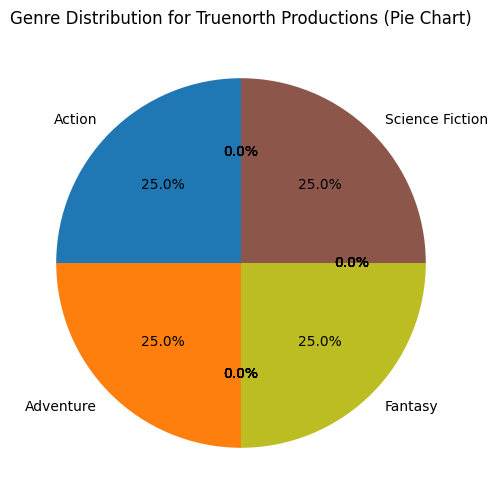

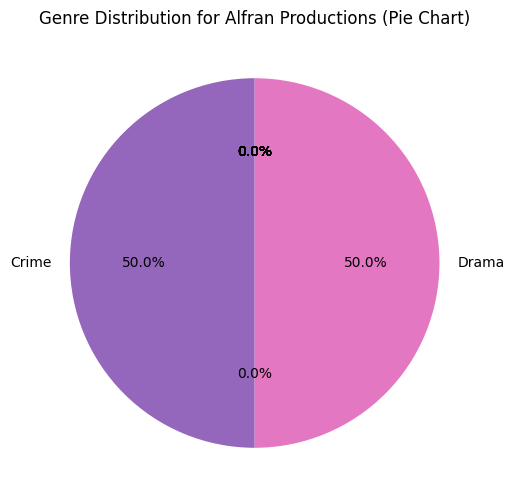

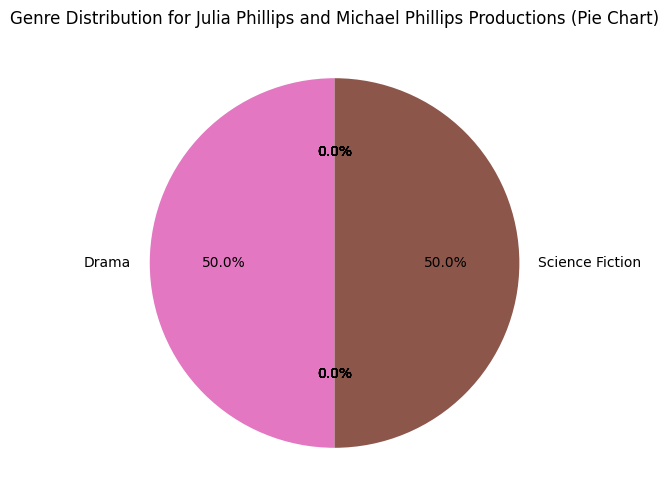

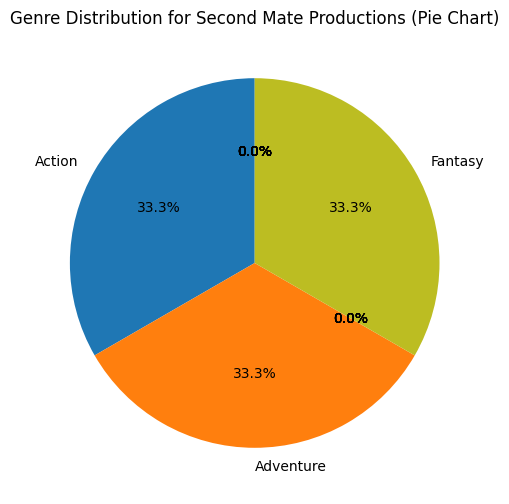

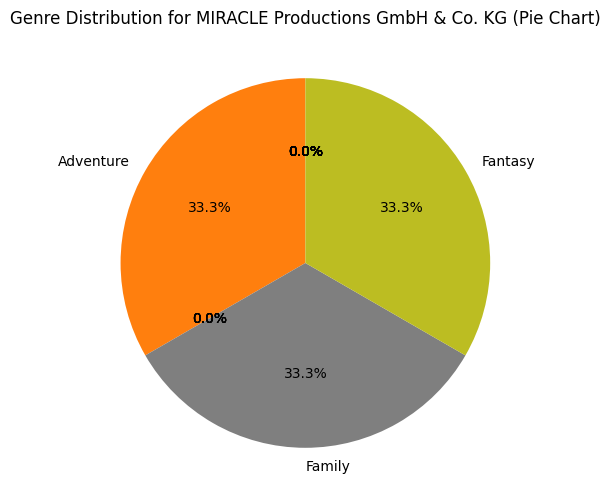

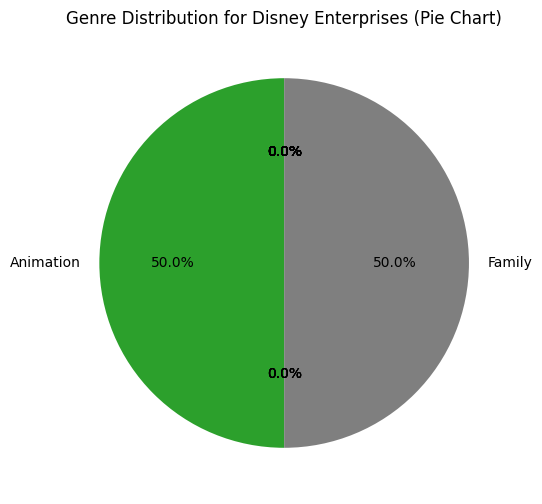

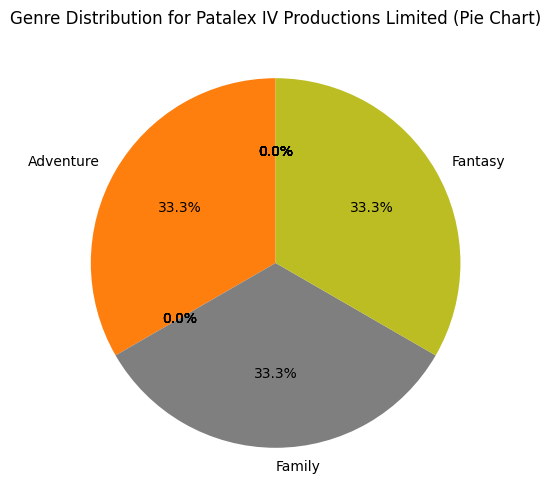

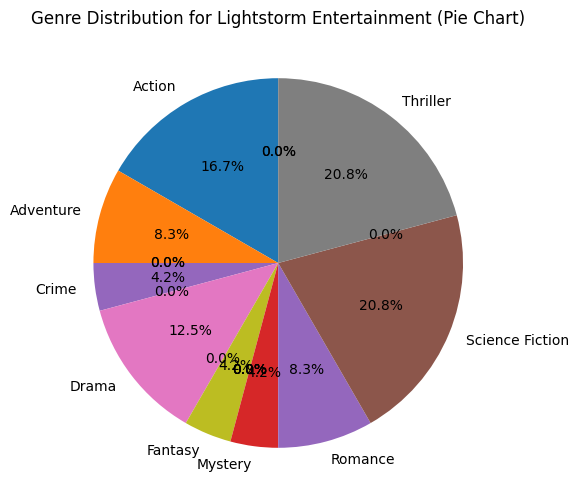

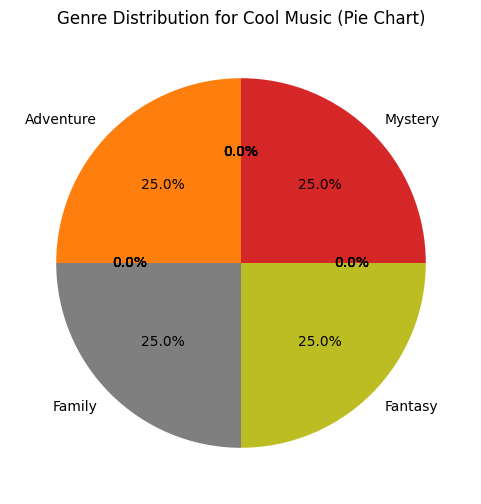

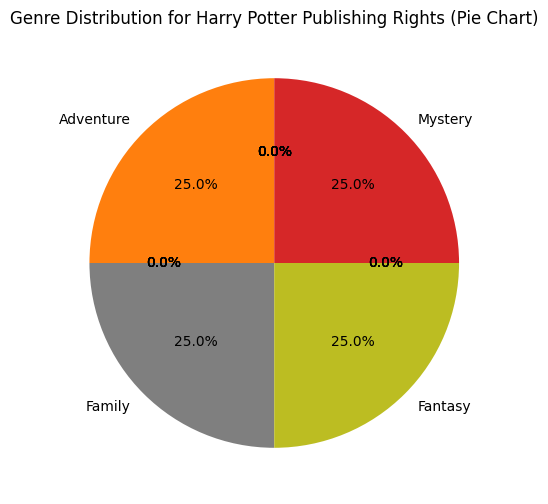

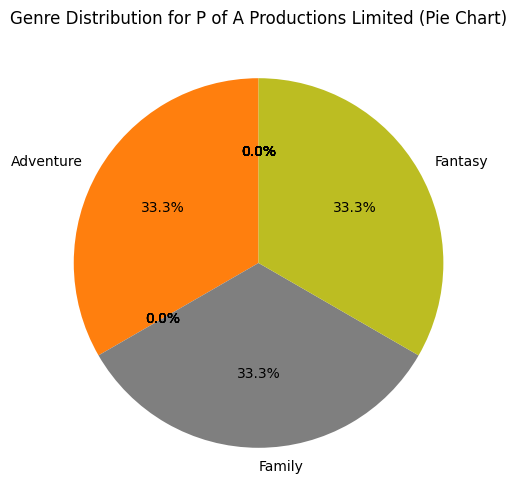

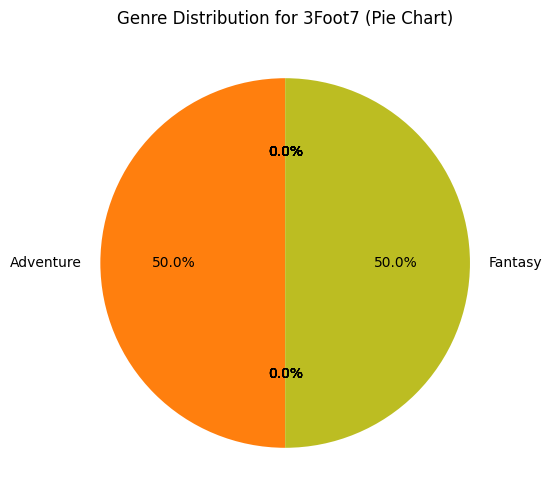

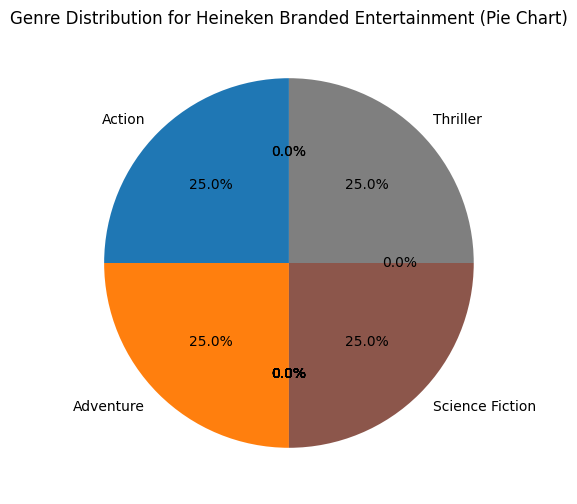

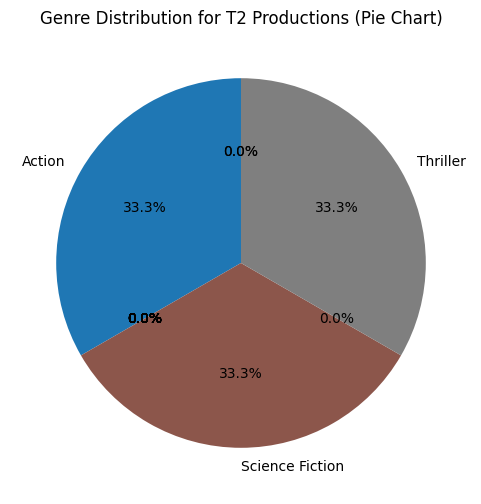

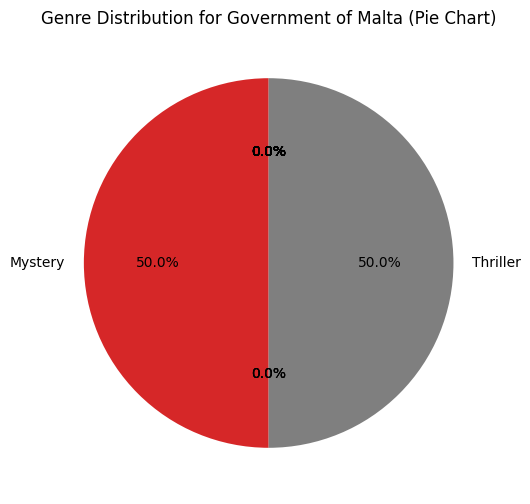

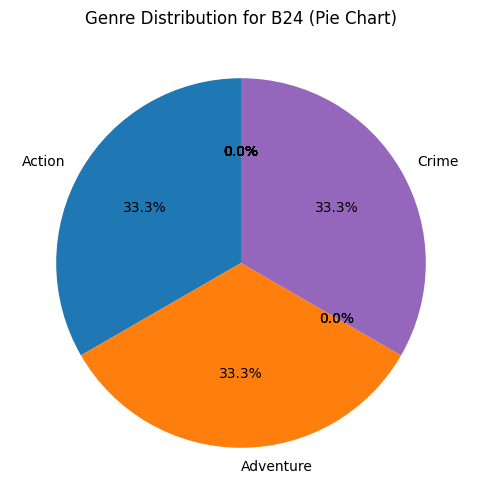

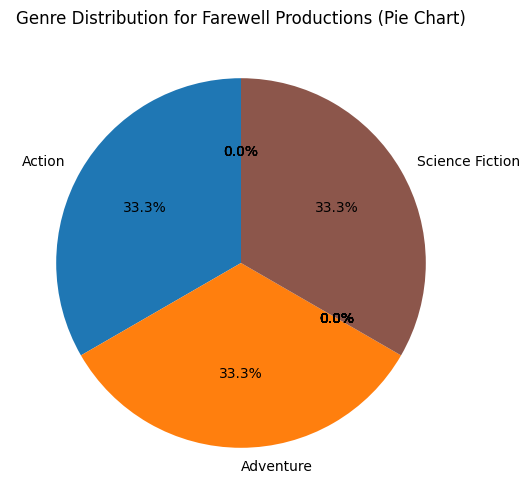

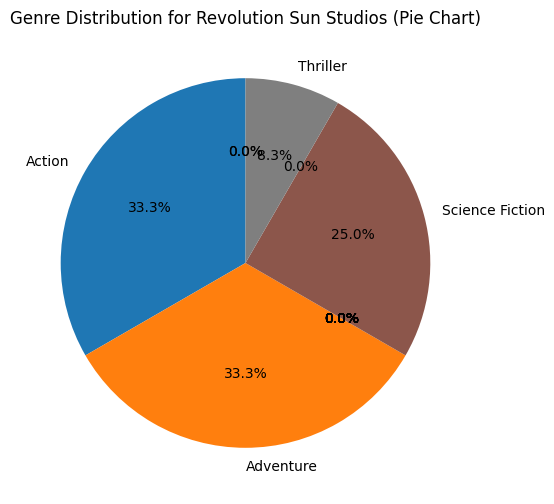

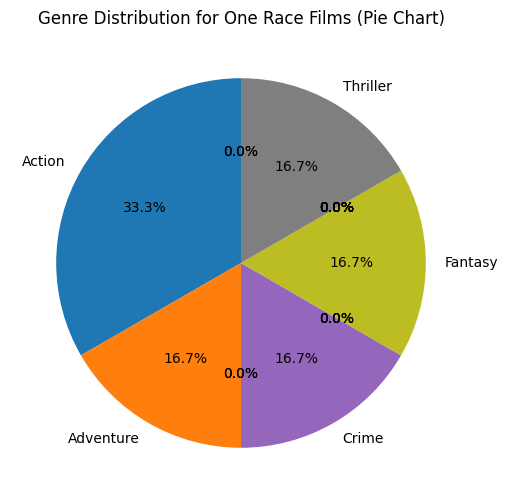

In [1632]:
for company in top_20_companies:
    plt.figure(figsize=(6, 6))
    genre_pivot_top20.loc[company].plot(kind='pie', autopct='%1.1f%%', startangle=90) # Use .loc[company] 
    plt.title(f'Genre Distribution for {company} (Pie Chart)')
    plt.ylabel('')  
    plt.show()

**Visualizing Genre Distribution with Pie Charts:**

I created individual pie charts for each of the top 20 production companies to visualize their genre distribution. Each pie chart provides a clear representation of the proportion of movies produced by a company in each genre.

In [1633]:
# Filter the DataFrame for movies by the top 20 companies
top_companies_movies = df_prod_companies[df_prod_companies['production_companies'].isin(top_20_companies)]

# Sort the movies by revenue in descending order 
top_companies_movies = top_companies_movies.sort_values(by='revenue_adj_millions', ascending=False)

**Filtering and Sorting Movies:**

To examine the most successful movies produced by the top 20 companies, I filtered the exploded `df_prod_companies` DataFrame to select movies associated with those companies. I then sorted these movies in descending order based on their adjusted revenue, allowing me to quickly identify the highest-grossing films.

In [1634]:
# Select relevant columns, format revenue, and create a copy
movies_df = top_companies_movies[['production_companies', 'original_title', 'genres', 'revenue_adj_millions', 'popularity']].copy() 
movies_df['revenue_adj_millions'] = movies_df['revenue_adj_millions'].apply(lambda x: f"{x:.2f} million")


**Selecting and Formatting the Data:**

To create a table of the most successful movies from the top 20 production companies, I selected relevant columns from the `top_companies_movies` DataFrame. I formated the revenue column (`revenue_adj_millions`) to display in millions for readability. I also used `.copy()` to create an explicit copy of the data to avoid potential warnings about chained assignments.

In [1635]:
# Rename the revenue column 
movies_df.rename(columns={'revenue_adj_millions': 'revenue_millions'}, inplace=True)

# Save to CSV
movies_df.to_csv('top_20_companies_movies.csv', index=False)
print("\nData for top 20 companies saved to 'top_20_companies_movies.csv'.")


Data for top 20 companies saved to 'top_20_companies_movies.csv'.


**Saving and Displaying the Final Results:**

I renamed the `'revenue_adj_millions'` column to `'revenue_millions'` for consistency. Then, I saved the DataFrame `movies_df` (containing information about the highest-grossing films from the top 20 production companies) to a CSV file. This makes the data easily accessible for further analysis or sharing outside of the Jupyter Notebook.

**Do certain production companies consistently produce higher-grossing movies?:**

The data points to a strong link between certain production companies and high average revenue. However, it's essential to consider the influence of blockbuster franchises, which can significantly skew these figures.

* **Franchise Powerhouses:** Companies heavily involved in highly successful franchises often dominate the top of the list. For example, Truenorth Productions' impressive average revenue is solely due to "Star Wars: The Force Awakens." Similarly, companies associated with the "Harry Potter" franchise, such as Patalex IV Productions Limited and Cool Music, have remarkably high average revenues.
* **Individual Success vs. Franchise Success:** While franchise involvement is a significant factor, some companies, like Lightstorm Entertainment (associated with James Cameron), achieve consistently high revenue through both franchise hits ("Avatar") and standalone successes ("Titanic").
  
**Are there specific production companies that dominate certain genres?:**

The genre breakdown analysis reveals clear genre preferences for some of the top-performing production companies:

* **Action and Sci-Fi Dominance:**  Companies like Lightstorm Entertainment and Revolution Sun Studios (likely due to their involvement in Marvel films) predominantly produce Action, Adventure, and Science Fiction movies, reflecting the popularity and profitability of these genres.
* **Genre Specialists:**  Other companies exhibit a strong focus on specific genres, such as:
    * Truenorth Productions (Sci-Fi, Fantasy, Adventure)
    * Lucasfilm (primarily associated with "Star Wars")
    * Warner Bros. (strong presence in Family and Animation).
* **Production Volume vs. Revenue:** The data also highlights that high average revenue doesn't always correlate with high production volume. Some companies, like Hoya Productions ("The Exorcist"), achieve substantial success with a limited number of films, while others, like Warner Bros., maintain a more diverse portfolio across genres and release a larger volume of movies.

### Production Companies and Budget Trends:  Do the top production companies favor high-budget or low-budget productions?

In [1636]:
# Review the head of the dataset to remind ourselves of its structure
print(df.head(5))
print(df.info())

       id    imdb_id  popularity  budget_millions  revenue_millions  \
0  135397  tt0369610   32.985763            150.0       1513.528810   
1   76341  tt1392190   28.419936            150.0        378.436354   
2  262500  tt2908446   13.112507            110.0        295.238201   
3  140607  tt2488496   11.173104            200.0       2068.178225   
4  168259  tt2820852    9.335014            190.0       1506.249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast          director  \
0  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   Colin Trevorrow   
1  [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...     George Miller   
2  [Shailene Woodley, Theo James, Kate Winslet, A...  Robert Schwentke   
3  [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...       J.J. Ab

In [1637]:
# Create a DataFrame for production company budget analysis 
df_prod_budgets = df.copy()
df_prod_budgets = df_prod_budgets.explode('production_companies', ignore_index=True)
df_prod_budgets = df_prod_budgets[df_prod_budgets['production_companies'] != 'Unknown']

# Define budget thresholds for high and low budget categories (in millions)
high_budget_threshold = 100
low_budget_threshold = 10

**Prepare Production Budgets DataFrame:**

Do top production companies tend to favor big-budget films, smaller productions, or a mix of both? To explore this, I categorized movies into budget categories and analyze the distribution of these categories among the production companies.

I created a copy of our DataFrame, `df_prod_budgets`, explode the `production_companies` column to get each company on its own row, and remove any rows with 'Unknown' production companies. I set a `high_budget_threshold` at 100 million dollars and a `low_budget_threshold` at 10 million dollars to create three budget categories: low, medium, and high.

In [1638]:
# Create a 'budget_category' column
df_prod_budgets['budget_category'] = pd.cut(
    df_prod_budgets['budget_adj_millions'],
    bins=[-float("inf"), low_budget_threshold, high_budget_threshold, float("inf")],
    labels=['Low Budget', 'Medium Budget', 'High Budget']
)

**Create a `'budget_category'` Column:**

To categorize each movie by its budget, I used the `pd.cut()` function. This creates a new column, `budget_category`, which assigns each film to a category based on its adjusted budget: 'Low Budget', 'Medium Budget', or 'High Budget'.

In [1639]:
# Group by production company and budget category, then count movies
budget_category_counts = df_prod_budgets.groupby(['production_companies', 'budget_category'], observed=False)['id'].count().reset_index(name='movie_count')

**Group and Count:**

Next, I grouped our data by both the `production_companies` and their `budget_category`, counting the number of movies in each combination using `.count()`. The `observed=False` argument ensures that all budget categories are included in the results, even if a company has not produced any films in a particular category.

In [1640]:
# Pivot the table for readability
budget_category_pivot = budget_category_counts.pivot(
    index='production_companies', 
    columns='budget_category', 
    values='movie_count'
).fillna(0).astype(int)

# Get the top 20 companies based on average revenue (from previous analysis)
top_20_companies = prod_company_performance.sort_values(by='avg_revenue', ascending=False).head(20).index

# Display the budget category breakdown for the top 20 companies
print("\nBudget Category Counts for Top 20 Production Companies:")
print(budget_category_pivot.loc[top_20_companies])


Budget Category Counts for Top 20 Production Companies:
budget_category                                  Low Budget  Medium Budget  \
production_company                                                           
Hoya Productions                                          0              1   
Truenorth Productions                                     0              0   
Alfran Productions                                        0              1   
Julia Phillips and Michael Phillips Productions           0              1   
Second Mate Productions                                   0              0   
MIRACLE Productions GmbH & Co. KG                         0              0   
Disney Enterprises                                        0              0   
Patalex IV Productions Limited                            0              0   
Lightstorm Entertainment                                  0              2   
Harry Potter Publishing Rights                            0              0   
Cool Mu

**Display the Budget Category Breakdown:**

I now pivoted the `budget_category_counts` DataFrame to create a more readable table, making production companies the rows, budget categories the columns, and the count of movies the cell values. Missing values are replaced with 0, and all counts are converted to integers. Then, I retrieved the top 20 production companies based on average revenue from our earlier analysis. Finally, I displayed a table showing the budget category breakdown for these top 20 companies.

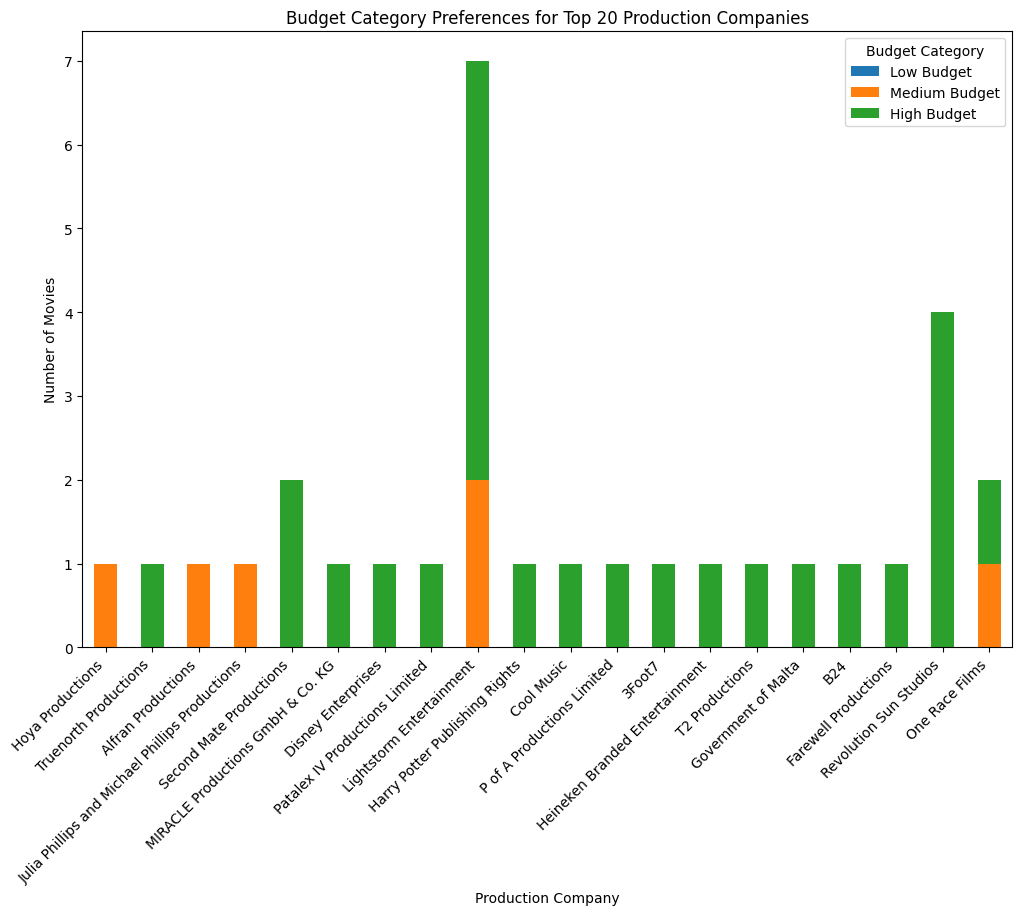

In [1641]:
# Create a bar chart to visualize budget category preferences 
budget_category_pivot.loc[top_20_companies].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Budget Category Preferences for Top 20 Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Budget Category')
plt.show()

**Visualize Budget Category Preferences:**

To visualize the budget category breakdown, I created a stacked bar chart. Each bar represents a production company. The segments within the bar show the number of movies produced in each budget category. This visualization allows me to quickly see the overall budget preferences for each company.

In [1643]:
# Calculate the proportion of movies in each budget category
budget_category_proportions = budget_category_pivot.apply(lambda x: x / x.sum(), axis=1) 

print("\nBudget Category Proportions for Top 20 Companies:")
print(budget_category_proportions.loc[top_20_companies])


Budget Category Proportions for Top 20 Companies:
budget_category                                  Low Budget  Medium Budget  \
production_company                                                           
Hoya Productions                                        0.0       1.000000   
Truenorth Productions                                   0.0       0.000000   
Alfran Productions                                      0.0       1.000000   
Julia Phillips and Michael Phillips Productions         0.0       1.000000   
Second Mate Productions                                 0.0       0.000000   
MIRACLE Productions GmbH & Co. KG                       0.0       0.000000   
Disney Enterprises                                      0.0       0.000000   
Patalex IV Productions Limited                          0.0       0.000000   
Lightstorm Entertainment                                0.0       0.285714   
Harry Potter Publishing Rights                          0.0       0.000000   
Cool Music   

**Calculate the Proportion of Movies:**

To compare production companies with different output volumes more effectively, I calculated the proportion of films in each budget category for each company. This normalized view provides a better understanding of their relative budget preferences.

In [1644]:
# Filter for companies with a high proportion of high-budget films
high_budget_companies = budget_category_proportions[budget_category_proportions['High Budget'] > 0.5]
print("\nCompanies with over 50% High-Budget Films:\n", high_budget_companies)


Companies with over 50% High-Budget Films:
 budget_category               Low Budget  Medium Budget  High Budget
production_companies                                                
3Foot7                               0.0            0.0          1.0
80 Days Productions                  0.0            0.0          1.0
A113                                 0.0            0.0          1.0
AFG Talons Productions               0.0            0.0          1.0
Alberto Grimaldi Productions         0.0            0.0          1.0
...                                  ...            ...          ...
Walwa Films S.A.                     0.0            0.0          1.0
Whamaphram Productions               0.0            0.0          1.0
Wild Things Productions              0.0            0.0          1.0
XM2 Productions                      0.0            0.0          1.0
Zohar International                  0.0            0.0          1.0

[151 rows x 3 columns]


**Filter for High-Budget Companies:**

I'd like to identify companies that primarily focus on high-budget productions so I will filter my data. In this case, I selected companies where more than 50% of their movies fall into the 'High Budget' category.

In [1645]:
# Get a list of movies from these high-budget companies
high_budget_movies_df = df_prod_budgets[df_prod_budgets['production_companies'].isin(high_budget_companies.index)][['production_companies', 'original_title', 'budget_adj_millions', 'genres']]
high_budget_movies_df['budget_adj_millions'] = high_budget_movies_df['budget_adj_millions'].apply(lambda x: f"{x:.2f} million")
print("\nMovies from High-Budget Companies:")
print(high_budget_movies_df)

# Save high_budget_companies DataFrame to a CSV file
high_budget_companies.to_csv('high_budget_companies.csv')
print("\nData for high-budget companies saved to 'high_budget_companies.csv'.")

# Save high_budget_movies_df DataFrame to a CSV file
high_budget_movies_df.to_csv('high_budget_companies_movies.csv', index=False)
print("Movie data for high-budget companies saved to 'high_budget_companies_movies.csv'.")


Movies from High-Budget Companies:
                      production_companies                  original_title  \
12                   Truenorth Productions    Star Wars: The Force Awakens   
25                    Skydance Productions              Terminator Genisys   
35     Walt Disney Studios Motion Pictures                      Inside Out   
38                                     B24                         Spectre   
50                  Revolution Sun Studios         Avengers: Age of Ultron   
...                                    ...                             ...   
23555                     Walwa Films S.A.                       Cleopatra   
24016           George Stevens Productions    The Greatest Story Ever Told   
24082                       Dovemead Films                        Superman   
24083                     Film Export A.G.                        Superman   
24193                            Thalia AG  The Bible: In the Beginning...   

      budget_adj_millions  

**Get Movies from High-Budget Companies:**

1. I filtered the `df_prod_budgets` DataFrame to select movies where the production company is in the `high_budget_companies` index (the list of high-budget companies).
2. I selected the columns `'production_companies'`, `'original_title'`, `'budget_adj_millions'`, and `'genres'`.
3. I formated the `budget_adj_millions` column for readability.
4. I printed this DataFrame to display the movies from these high-budget companies.
5. I used `to_csv()` to save the `high_budget_companies` DataFrame (containing company names and budget proportions) to a file named `'high_budget_companies.csv'`.
6. I did the same for `high_budget_movies_df` to save the details of the high budget movies to `'high_budget_companies_movies.csv'`.

**Two CSV files:**
`high_budget_companies.csv`: Contains the list of production companies that primarily produce high-budget films and their budget category proportions.
`high_budget_companies_movies.csv`: Lists the movies produced by these companies, along with their adjusted budgets and genres.

**Do the top production companies favor high-budget or low-budget productions?**  

Examining the budget distributions for the top 20 highest-earning production companies reveals a clear preference for high-budget films among this group.

* **High-Budget Dominance:** The majority of the top 20 companies have produced predominantly "High Budget" films (with adjusted budgets exceeding $100 million in 2010 dollars). This is evident both in the raw movie counts and the proportions.

* **Franchise Power:** This preference for high-budget productions is likely driven by the involvement of these companies in major franchises, as I have observed in my previous analysis.  Franchises often involve large-scale productions with substantial budgets for special effects, marketing, and star power.  

* **Notable Exceptions:**  While most companies in this top 20 favor high budgets, there are a few notable exceptions.  "One Race Films" shows a more balanced approach with a higher proportion of "Medium Budget" movies. 

* **Visualizing the Trend:** The stacked bar charts effectively illustrate these budget preferences, making it clear that high-budget films dominate the output of the most financially successful production companies. 

### Most Profitable Movies: What are the most profitable movies in the dataset?  What are the most profitable movies in each decade?

In [1646]:
# Review the head of the dataset to remind ourselves of its structure
print(df.head(10))
print(df.info())

       id    imdb_id  popularity  budget_millions  revenue_millions  \
0  135397  tt0369610   32.985763            150.0       1513.528810   
1   76341  tt1392190   28.419936            150.0        378.436354   
2  262500  tt2908446   13.112507            110.0        295.238201   
3  140607  tt2488496   11.173104            200.0       2068.178225   
4  168259  tt2820852    9.335014            190.0       1506.249360   
5  281957  tt1663202    9.110700            135.0        532.950503   
6   87101  tt1340138    8.654359            155.0        440.603537   
7  286217  tt3659388    7.667400            108.0        595.380321   
8  211672  tt2293640    7.404165             74.0       1156.730962   
9  150540  tt2096673    6.326804            175.0        853.708609   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   
5       

In [1647]:
# Find the top 10 most profitable movies overall
top_10_profitable = df.sort_values(by='profit_millions', ascending=False).head(10)

print("\nTop 10 Most Profitable Movies:")
print(top_10_profitable[['original_title', 'release_year', 'profit_millions']])


Top 10 Most Profitable Movies:
                       original_title  release_year  profit_millions
1329                        Star Wars          1977      2750.136651
1386                           Avatar          2009      2586.236848
5231                          Titanic          1997      2234.713671
10594                    The Exorcist          1973      2128.035625
9806                             Jaws          1975      1878.643094
8889       E.T. the Extra-Terrestrial          1982      1767.968064
3        Star Wars: The Force Awakens          2015      1718.723211
8094                          The Net          1995      1551.568265
10110  One Hundred and One Dalmatians          1961      1545.635295
7309          The Empire Strikes Back          1980      1376.997526


**Top 10 Overall:**  

Let's identify the most profitable movies in my dataset, both overall and within each decade. I am curious to discover which films have generated the greatest returns on investment, providing insights into potential blockbuster trends and shifts in audience preferences over time.

I sorted the DataFrame by the `profit_millions` column in descending order and select the top 10 rows. Then, I'll display the `'original_title'`, `'release_year'`, and `'profit_millions'` for these movies.

In [1648]:
# Group by decade and find the most profitable movie in each decade
most_profitable_by_decade = df.groupby('decade')['profit_millions'].idxmax()

print("\nMost Profitable Movie by Decade:")
print(df.loc[most_profitable_by_decade, ['original_title', 'release_year', 'profit_millions']])


Most Profitable Movie by Decade:
                       original_title  release_year  profit_millions
10110  One Hundred and One Dalmatians          1961      1545.635295
1329                        Star Wars          1977      2750.136651
8889       E.T. the Extra-Terrestrial          1982      1767.968064
5231                          Titanic          1997      2234.713671
1386                           Avatar          2009      2586.236848
3        Star Wars: The Force Awakens          2015      1718.723211


**Most Profitable by Decade:**  

I grouped the DataFrame by `decade` and use `idxmax()` to find the index of the row with the highest profit within each decade. I then used these indices to display the `'original_title'`, `'release_year'`, and `'profit_millions'` for the most profitable film in each decade.

**The Most Profitable Movies:**

* **Star Wars (1977):**  Unsurprisingly, the original "Star Wars" reigns supreme as the most profitable film in the dataset, demonstrating the enduring power of a captivating story, memorable characters, and groundbreaking special effects.
* **Avatar (2009) and Titanic (1997):**  James Cameron's visionary films showcase the allure of epic storytelling and technological advancements, captivating audiences worldwide and generating massive box office returns.
* **Franchise Dominance:**  The top 10 most profitable films include multiple entries from  "Star Wars", highlighting the power of established brands and loyal fan bases.

**Profitable Movies by Decade:**

* **The Enduring Power of Family Films:** "One Hundred and One Dalmatians" (1961) leads the 1960s, demonstrating the enduring appeal of family-friendly entertainment. 
* **Sci-Fi and Fantasy Reign:** From "Star Wars" (1977) to "E.T." (1982) and "Avatar" (2009), science fiction and fantasy films have consistently delivered high profitability, capturing the imagination of audiences across generations.
* **The Blockbuster Formula:** The most profitable movies often share characteristics like strong storytelling, memorable characters, innovative special effects, and broad audience appeal. 

**Audience Preferences Over Time:**

While blockbuster films have consistently been profitable, the data hints at shifts in audience preferences:

* **From Family to Sci-Fi/Fantasy:**  The shift from a family-friendly film topping the 1960s to the dominance of sci-fi/fantasy in later decades suggests a change in audience tastes and the increasing role of special effects in driving box office success.
* **The Rise of Franchises:**  The increasing presence of franchise films in the list of most profitable movies indicates a growing reliance on established intellectual property (IP) and sequels to attract audiences. 

### Director Impact on Ratings: Do movies by certain directors tend to receive higher vote averages than others, even when controlling for genre or budget?

In [1649]:
# Review the head of the dataset to remind ourselves of its structure
print(df.head(10))
print(df.info())

       id    imdb_id  popularity  budget_millions  revenue_millions  \
0  135397  tt0369610   32.985763            150.0       1513.528810   
1   76341  tt1392190   28.419936            150.0        378.436354   
2  262500  tt2908446   13.112507            110.0        295.238201   
3  140607  tt2488496   11.173104            200.0       2068.178225   
4  168259  tt2820852    9.335014            190.0       1506.249360   
5  281957  tt1663202    9.110700            135.0        532.950503   
6   87101  tt1340138    8.654359            155.0        440.603537   
7  286217  tt3659388    7.667400            108.0        595.380321   
8  211672  tt2293640    7.404165             74.0       1156.730962   
9  150540  tt2096673    6.326804            175.0        853.708609   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   
5       

In [1650]:
# Define the minimum number of movies and high-budget threshold
min_movies = 5
high_budget_threshold = 100  # 100 million 

# Create a copy of the DataFrame for director analysis 
df_directors = df.copy()

**Preparing the Director DataFrame:**

To analyze the impact of directors on movie ratings, I created a dedicated DataFrame, `df_directors`. This ensures that any changes we make for this analysis won't affect the original dataset. I also set a minimum threshold `min_movies` to filter for directors who have directed a substantial number of films, reducing the influence of directors with only a few movies.

In [1651]:
# Group by 'director' and calculate the mean vote_average, and the count of movies 
director_data = df_directors.groupby('director')['vote_average'].agg(['mean', 'count']).reset_index()
director_data.rename(columns={'mean': 'avg_rating', 'count': 'movie_count'}, inplace=True)

**Grouping and Calculating Average Ratings:**

I grouped the `df_directors` DataFrame by `director` and calculate the average `vote_average` (renamed to `avg_rating`) and the number of films (`movie_count`) directed by each director using the `.agg()` method. I then reset the index for easier manipulation.

In [1652]:
# Filter for directors with at least 'min_movies' 
filtered_directors = director_data[director_data['movie_count'] >= min_movies]
print("Top 20 Directors by Average Vote Average (with at least 5 movies):\n", filtered_directors.sort_values(by='avg_rating', ascending=False).head(20))

Top 20 Directors by Average Vote Average (with at least 5 movies):
                   director  avg_rating  movie_count
4413       Shannon Hartman    7.520000            5
845      Christopher Nolan    7.470000           10
4494       Stanley Kubrick    7.388889            9
2985            Louis C.K.    7.360000            5
2623           Joss Whedon    7.360000            5
3898     Quentin Tarantino    7.354545           11
4944          Wes Anderson    7.225000           12
1106         David Fincher    7.210000           10
4484           Spike Jonze    7.160000            5
167        Alfonso CuarÃ³n    7.140000            5
1203           David Yates    7.140000            5
3240        Matthew Vaughn    7.120000            5
2128             Jay Oliva    7.116667            6
4997   Wolfgang Reitherman    7.100000            5
2342             Joel Coen    7.060000           10
3739  Paul Thomas Anderson    7.037500            8
1942           J.J. Abrams    7.020000          

**Filtering and Displaying Top Directors:**

I filtered the `director_data` DataFrame to include only directors who have directed at least `min_movies` films. This focuses our analysis on more established directors and helps mitigate the influence of directors with limited filmographies. The code then prints a table displaying the top 20 directors based on their average vote ratings.

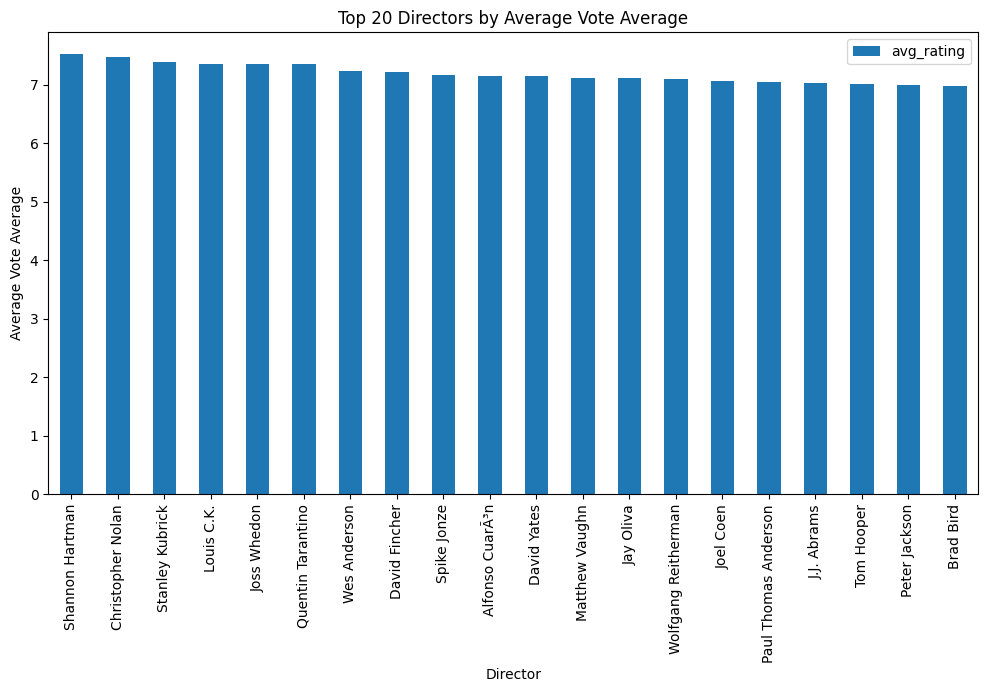

In [1653]:
# Visualize average ratings for top directors using a bar chart 
filtered_directors.sort_values(by='avg_rating', ascending=False).head(20).plot(
    x='director', y='avg_rating', kind='bar', figsize=(12, 6), 
    title='Top 20 Directors by Average Vote Average'
)
plt.xlabel("Director")
plt.ylabel("Average Vote Average")
plt.show()

**Visualizing Top Directors' Average Ratings:**

To visually represent the average ratings of the top 20 directors, I created a bar chart. Each bar corresponds to a director, and the height of the bar represents their average vote average.

In [1654]:
# Create a list of genres to explore (excluding 'Unknown')
genres_to_explore = df['genres'].explode().unique().tolist()
if 'Unknown' in genres_to_explore:
    genres_to_explore.remove('Unknown') 

**Creating a List of Genres:**

To control for genre, we'll analyze director ratings within each genre. First, I created a list of unique genres from the original DataFrame, excluding the "Unknown" category.

In [1655]:
# Loop through each genre
for genre in genres_to_explore:
    # Filter the DataFrame for the current genre
    genre_movies = df_directors[df_directors['genres'].apply(lambda x: genre in x)] 

    # Group by director, calculate average rating, and count movies for the current genre
    genre_director_data = genre_movies.groupby('director')['vote_average'].agg(['mean', 'count']).reset_index()
    genre_director_data.rename(columns={'mean': 'avg_rating', 'count': 'movie_count'}, inplace=True)

    # Filter for directors with at least 'min_movies' in the genre
    filtered_genre_directors = genre_director_data[genre_director_data['movie_count'] >= min_movies]

    # Print the top 20 directors for the genre
    print(f"\nTop 20 {genre} Directors by Average Vote Average (with at least {min_movies} movies):")
    print(filtered_genre_directors.sort_values(by='avg_rating', ascending=False).head(20))



Top 20 Action Directors by Average Vote Average (with at least 5 movies):
               director  avg_rating  movie_count
1027  Quentin Tarantino    7.450000            6
990       Peter Jackson    7.166667            6
527       James Cameron    7.133333            6
967     Paul Greengrass    6.866667            6
766   Lauren Montgomery    6.780000            5
78        Antoine Fuqua    6.700000            8
1144            Sam Liu    6.650000            6
1123         Ron Howard    6.640000            5
1370        Zack Snyder    6.580000            5
1315         Tony Scott    6.572727           11
1254   Steven Spielberg    6.563636           11
1147      Sam Peckinpah    6.525000            8
457      Gore Verbinski    6.520000            5
1070       Ridley Scott    6.466667           12
1326            Unknown    6.466667            6
657         John Milius    6.420000            5
873        Michael Mann    6.400000            5
335          Don Siegel    6.350000        

**Analyzing Director Ratings by Genre:**

Now, I looped through each genre in our list and analyze the average ratings of directors within that specific genre. This allows me to compare directors who have made multiple films in the same genre.

In [1656]:
# Filter for high-budget movies
high_budget_movies = df_directors[df_directors['budget_adj_millions'] >= high_budget_threshold]

# Group by director and calculate average rating and movie count for high-budget movies
high_budget_director_data = high_budget_movies.groupby('director')['vote_average'].agg(['mean', 'count']).reset_index()
high_budget_director_data.rename(columns={'mean': 'avg_rating', 'count': 'movie_count'}, inplace=True)

**Filtering High-Budget Movies:**

To assess if directors working with large budgets produce higher-rated films, I filtered our data to focus on high-budget movies. I selected movies with an adjusted budget exceeding the `high_budget_threshold`. I then grouped this subset by director and calculate their average rating and movie count.

In [1657]:
# Filter for directors with at least 'min_movies' high-budget films
filtered_high_budget_directors = high_budget_director_data[high_budget_director_data['movie_count'] >= min_movies]

print("\nTop 20 High-Budget Directors by Average Vote Average (with at least 5 movies):\n", filtered_high_budget_directors.sort_values(by='avg_rating', ascending=False).head(20))


Top 20 High-Budget Directors by Average Vote Average (with at least 5 movies):
               director  avg_rating  movie_count
37   Christopher Nolan    7.760000            5
179      Peter Jackson    7.283333            6
83       James Cameron    7.080000            5
63    Francis Lawrence    6.760000            5
209    Robert Zemeckis    6.700000            6
74      Gore Verbinski    6.680000            5
197       Ridley Scott    6.587500            8
152        Michael Bay    6.344444            9
244         Tony Scott    6.220000            5
234   Steven Spielberg    6.214286            7
236         Tim Burton    6.183333            6
214         Ron Howard    6.100000            6
212    Roland Emmerich    5.957143            7


**Filtering Experienced High-Budget Directors:**

To focus on established directors who have worked on multiple high-budget projects, I further filtered the `high_budget_director_data` to include only directors who have directed at least five high-budget films. The code then displays the top 20 directors in this category, ranked by their average vote average.


**The Director's Touch:  Analyzing Director Influence on Movie Ratings:**

My exploration of movie ratings by director suggests that certain directors consistently deliver films that resonate with audiences, achieving higher average vote ratings. However, franchise involvement and genre specialization play a significant role in shaping these trends. 

**Directors Who Stand Out:**

* **Consistent Excellence:** Some directors consistently achieve high average ratings across genres, suggesting a strong directorial style and ability to craft compelling narratives.

* Examples include:
    - **Christopher Nolan:** High ratings overall, in Drama, Action, Thriller, and for high-budget films. 
    - **Quentin Tarantino:**  Consistently high ratings in Action, Thriller, and Crime.
    - **David Fincher:**  Tops the charts for Thriller and Drama and performs well in other categories.

* **Genre Specialists:**  Certain directors excel in specific genres:
    - **Sam Raimi:**  Leads in Fantasy, likely influenced by the "Spider-Man" trilogy.
    - **Wolfgang Reitherman:** A top-rated director in Animation and Family films. 

* **Franchise Factor:**  The data reveals the influence of franchises, especially among directors who frequently work with high budgets. Many of the top-rated high-budget directors are known for their blockbuster franchise films, such as:
    - **Christopher Nolan:**  "The Dark Knight" trilogy
    - **Peter Jackson:** "The Lord of the Rings" trilogy

### The "Summer Blockbuster" Effect: Do movies released during the summer months (June, July, August) tend to have higher revenue or popularity compared to movies released in other seasons?

In [1658]:
# Review the head of the dataset to remind ourselves of its structure
print(df.head(10))
print(df.info())

       id    imdb_id  popularity  budget_millions  revenue_millions  \
0  135397  tt0369610   32.985763            150.0       1513.528810   
1   76341  tt1392190   28.419936            150.0        378.436354   
2  262500  tt2908446   13.112507            110.0        295.238201   
3  140607  tt2488496   11.173104            200.0       2068.178225   
4  168259  tt2820852    9.335014            190.0       1506.249360   
5  281957  tt1663202    9.110700            135.0        532.950503   
6   87101  tt1340138    8.654359            155.0        440.603537   
7  286217  tt3659388    7.667400            108.0        595.380321   
8  211672  tt2293640    7.404165             74.0       1156.730962   
9  150540  tt2096673    6.326804            175.0        853.708609   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   
5       

In [1659]:
# Create a copy of the DataFrame to avoid modifying the original
df_seasonal = df.copy() 

# Create a 'season' column based on release month
df_seasonal['season'] = df_seasonal['release_month'].apply(lambda x: 
                                                            'Summer' if 6 <= x <= 8 
                                                            else 'Other')

**"Summer Blockbuster" Effect Analysis:**

To explore the "Summer Blockbuster" effect, I first created a new column, `season`, to categorize movies based on their release month. Movies released during June, July, or August are labeled "Summer," while movies released in other months are labeled "Other."

In [1660]:
# Group by 'season' and calculate the mean revenue and popularity
seasonal_performance = df_seasonal.groupby('season').agg(
    avg_revenue=('revenue_adj_millions', 'mean'), 
    avg_popularity=('popularity', 'mean')
)

# Format revenue for readability
seasonal_performance['avg_revenue'] = seasonal_performance['avg_revenue'].apply(lambda x: f"{x:.2f} million")
print(seasonal_performance)

          avg_revenue  avg_popularity
season                               
Other   71.24 million        0.628238
Summer  90.34 million        0.706000


**Calculating Seasonal Performance:**

Next, I grouped the data by season and calculate the average adjusted revenue (avg_revenue) and the average popularity (avg_popularity) for both "Summer" and "Other" seasons.

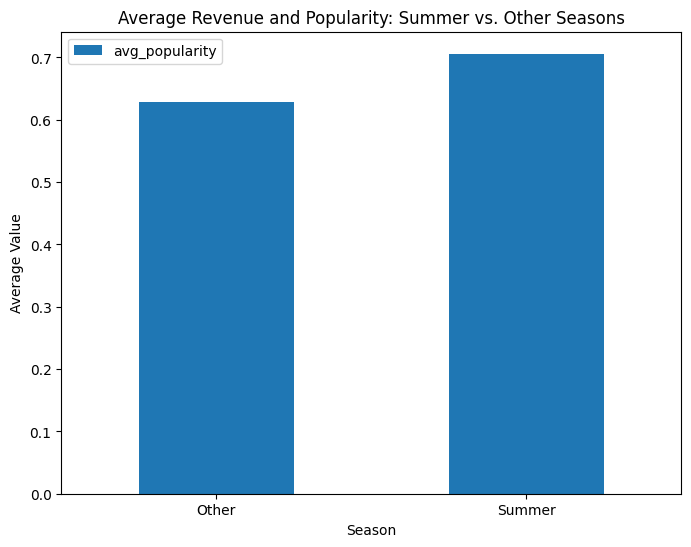

In [1661]:
# Create a bar chart comparing revenue and popularity
seasonal_performance.plot(kind='bar', figsize=(8, 6)) 
plt.title("Average Revenue and Popularity: Summer vs. Other Seasons")
plt.xlabel("Season")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.show()

**Visualizing Revenue and Popularity:**

To get a visual sense of the differences, I created a bar chart that directly compares the average revenue and popularity for movies released in the summer versus other seasons.

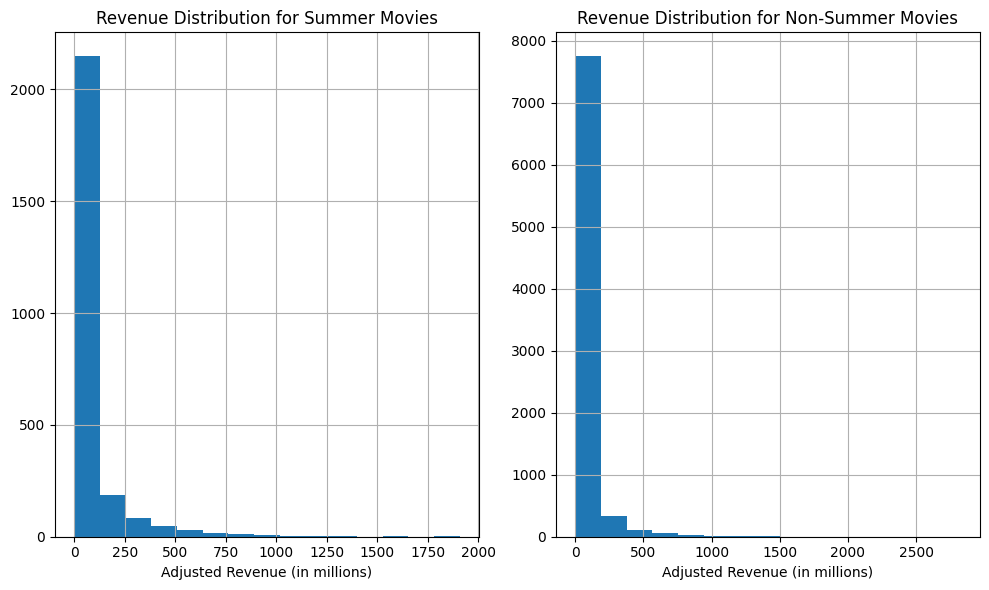

In [1662]:
# 1. Histograms of Revenue
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df_seasonal[df_seasonal['season'] == 'Summer']['revenue_adj_millions'].hist(bins=15)  # Correct column name
plt.title('Revenue Distribution for Summer Movies')
plt.xlabel('Adjusted Revenue (in millions)')

plt.subplot(1, 2, 2)
df_seasonal[df_seasonal['season'] != 'Summer']['revenue_adj_millions'].hist(bins=15) # Correct column name
plt.title('Revenue Distribution for Non-Summer Movies')
plt.xlabel('Adjusted Revenue (in millions)')

plt.tight_layout()
plt.show()

**Examining Revenue Distribution:**

To explore revenue in more detail, I created histograms to visualize the distribution of adjusted revenue for both summer releases and non-summer releases. This will help me see if summer movies generally have higher revenues or if there are just a few extreme outliers skewing the average.

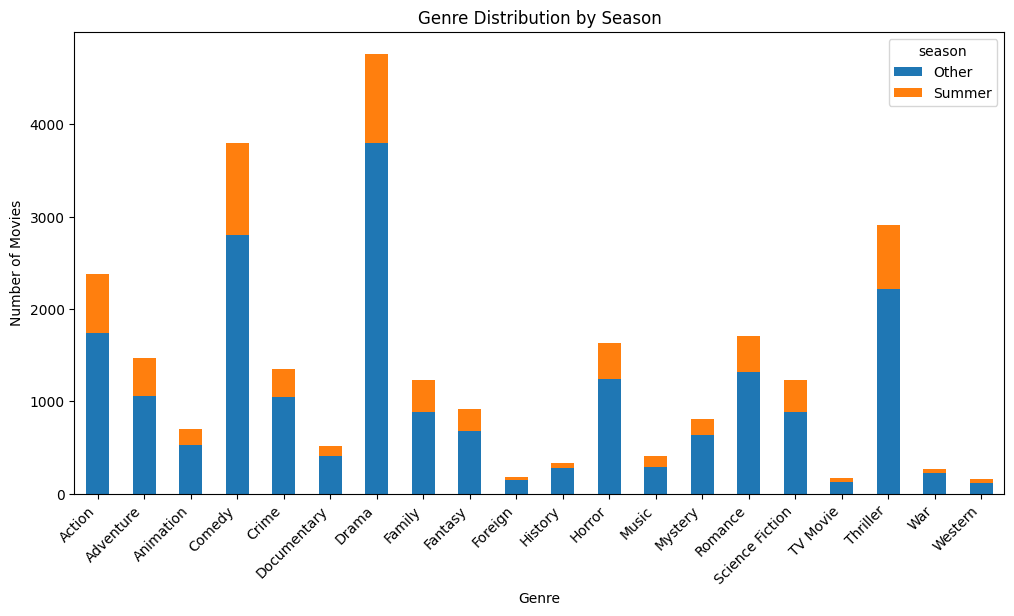

In [1663]:
# 2. Genre Trends by Season (Stacked Bar Chart)
# Explode 'genres' in df_seasonal AFTER calculating seasonal_performance
df_seasonal = df_seasonal.explode('genres', ignore_index=True)
df_seasonal = df_seasonal[df_seasonal['genres'] != 'Unknown']

genre_counts_by_season = df_seasonal.groupby(['season', 'genres'])['id'].count().reset_index(name='count')
genre_counts_by_season.pivot(index='genres', columns='season', values='count').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Genre Distribution by Season')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show() 

**Analyzing Genre Distribution by Season:**

I examined if certain genres are more prevalent during the summer months. I grouped by 'season' and 'genres' to calculate the count of movies in each combination and then created a stacked bar chart to visualize the results.

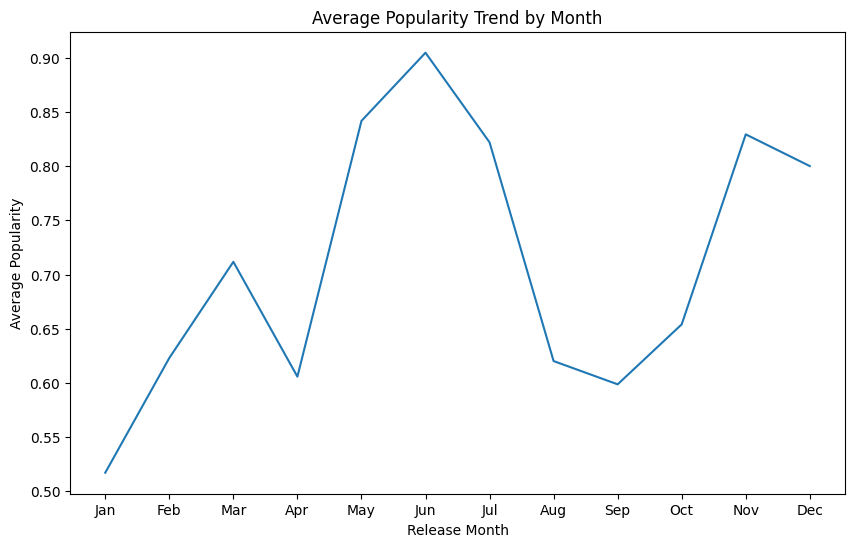

In [1664]:
# 3. Popularity Trend Over Time (Line Chart)
df_seasonal.groupby('release_month')['popularity'].mean().plot(kind='line', figsize=(10, 6))
plt.title('Average Popularity Trend by Month')
plt.xlabel('Release Month')
plt.ylabel('Average Popularity')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

**Visualizing Popularity Trends by Month:**

To identify any monthly patterns in popularity, I grouped by `'release_month'` and calculated the average popularity score for each month. I then used a line chart to visualize this trend over the 12 months of the year.

In [1665]:
# Group by 'season' and calculate the mean adjusted budget
seasonal_budget = df_seasonal.groupby('season')['budget_adj_millions'].mean()  # Correct column name

# Format budget for readability AFTER calculations
print(seasonal_budget.apply(lambda x: f"{x:.2f} million")) # Format after calculating the mean

season
Other     30.92 million
Summer    36.61 million
Name: budget_adj_millions, dtype: object


**Analyzing Seasonal Budget Trends:**

To see if studios allocate larger budgets to films released during the summer, I calculated the average budgets for movies in each season.

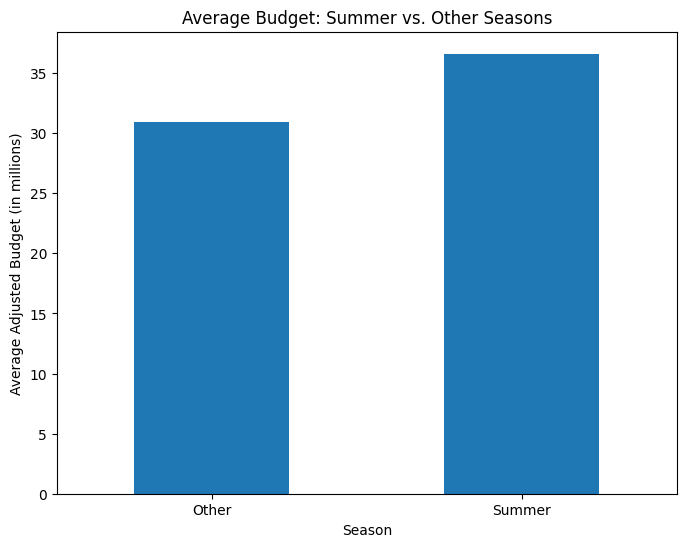

In [1667]:
# Create a bar chart comparing average budgets
seasonal_budget.plot(kind='bar', figsize=(8, 6))
plt.title("Average Budget: Summer vs. Other Seasons")
plt.xlabel("Season")
plt.ylabel("Average Adjusted Budget (in millions)")
plt.xticks(rotation=0)
plt.show()

**Visualizing Budget Differences:**

To compare average budgets for summer and non-summer releases, I used a bar chart. This visualization allows us to clearly see if there is a difference in budget allocation between the two seasons.

**The Summer Blockbuster Effect: A Seasonal Advantage:**

My analysis of movie releases by season reveals a noticeable trend:  **summer movies tend to perform better in terms of both revenue and popularity.**

* **Higher Revenue and Popularity:** Summer releases, on average, generate higher revenue and have greater popularity compared to films released during other seasons. This pattern is evident in both the table and the bar chart comparing average revenue and popularity.

* **Budget Alignment:** The data also shows that studios allocate larger budgets to summer releases, further supporting the notion of a strategic focus on the summer months. 

* **Genre and Distribution:**  The stacked bar chart of genre distribution reveals that certain genres, particularly **Action and Adventure**, are more prevalent during the summer, aligning with the typical characteristics of "blockbuster" films.  The histograms of revenue distribution show that while both summer and non-summer releases have a heavily right-skewed distribution (meaning a few high-earning films drive the average up), summer releases have a greater proportion of films in the higher revenue ranges.

* **Popularity Trends:**  The line chart of average monthly popularity supports the "Summer Blockbuster" effect, showing a clear peak in popularity during June and July.

**Conclusion:**

This analysis provides evidence to support the existence of a "Summer Blockbuster" effect. Studios strategically release high-budget films, often within genres like action and adventure, during the summer months to capitalize on favorable audience viewing patterns and maximize revenue potential. 

### Popularity and Release Month: Does the month of release (release_date) influence a movie's popularity (popularity)? Do certain months see a spike in the popularity of particular genres?

In [1668]:
# Review the head of the dataset to remind ourselves of its structure
print(df.head(10))
print(df.info())

       id    imdb_id  popularity  budget_millions  revenue_millions  \
0  135397  tt0369610   32.985763            150.0       1513.528810   
1   76341  tt1392190   28.419936            150.0        378.436354   
2  262500  tt2908446   13.112507            110.0        295.238201   
3  140607  tt2488496   11.173104            200.0       2068.178225   
4  168259  tt2820852    9.335014            190.0       1506.249360   
5  281957  tt1663202    9.110700            135.0        532.950503   
6   87101  tt1340138    8.654359            155.0        440.603537   
7  286217  tt3659388    7.667400            108.0        595.380321   
8  211672  tt2293640    7.404165             74.0       1156.730962   
9  150540  tt2096673    6.326804            175.0        853.708609   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   
5       

In [1669]:
# Create a DataFrame for release month analysis
df_release_month = df.copy()

# Explode the 'genres' column 
df_release_month = df_release_month.explode('genres', ignore_index=True)
df_release_month = df_release_month[df_release_month['genres'] != 'Unknown']

**Create a DataFrame for Release Month Analysis:**

Let's explore whether the month a movie is released influences its popularity. I also examined if certain genres tend to be more popular in specific months. I created a dedicated DataFrame, `df_release_month`, for this analysis and explode the `genres` column.

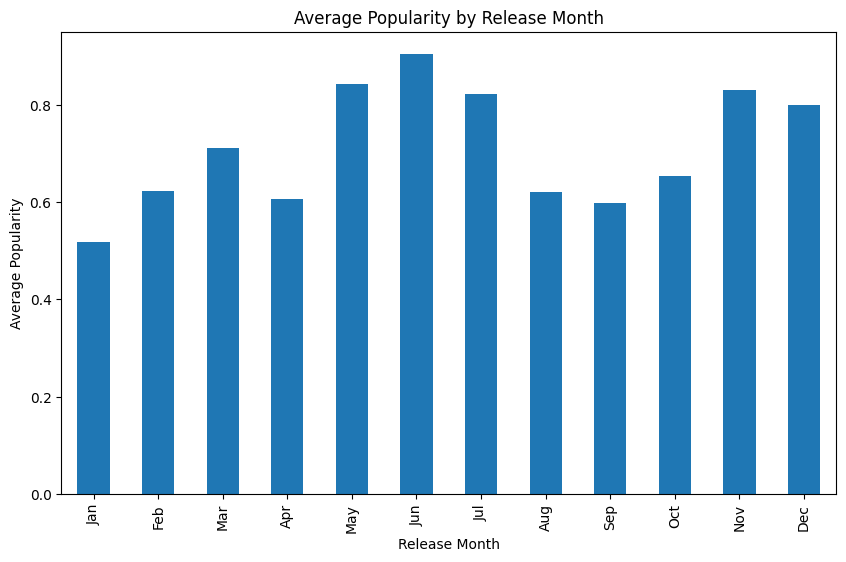

In [1670]:
# Group by 'release_month' and calculate the mean popularity
monthly_popularity = df_release_month.groupby('release_month')['popularity'].mean()

# Create a bar chart to visualize popularity by month
monthly_popularity.plot(kind='bar', figsize=(10, 6))
plt.title("Average Popularity by Release Month")
plt.xlabel("Release Month")
plt.ylabel("Average Popularity")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 
plt.show()

# Group by both 'release_month' and 'genres' and calculate the mean popularity
monthly_genre_popularity = df_release_month.groupby(['release_month', 'genres'])['popularity'].mean().reset_index(name='avg_popularity')

**Group and Visualize:**

First, I grouped the data by `release_month` and calculated the average popularity for each month using `.mean()`. I then visualized this data using a bar chart, making it easy to see if any particular months stand out in terms of movie popularity. Next, I analyzed genre popularity by month. I grouped by both `release_month` and `genres` to calculate the average popularity score for each genre in each month. I used `.reset_index()` to transform the result back into a DataFrame for easier manipulation and visualization.

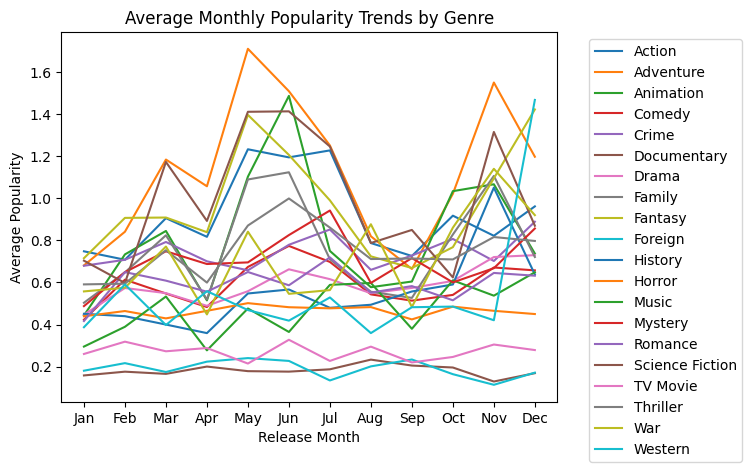

In [1671]:
# Create a separate line plot for each genre to show monthly popularity trends
for genre in monthly_genre_popularity['genres'].unique():
    genre_data = monthly_genre_popularity[monthly_genre_popularity['genres'] == genre]
    plt.plot(genre_data['release_month'], genre_data['avg_popularity'], label=genre)

plt.title('Average Monthly Popularity Trends by Genre')
plt.xlabel('Release Month')
plt.ylabel('Average Popularity')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot area
plt.show()

**Line Plot for Each Genre:**

To visually compare the popularity trends of different genres across months, I created separate line plots for each genre. Each line represents a genre, and its position on the y-axis shows the average popularity score for that genre in a specific month.

**Release Month and Movie Popularity: Decoding the Patterns:**

My investigation into the relationship between a movie's release month and its popularity has revealed some intriguing insights, suggesting that timing can indeed play a role in a film's success.

**Does the Month of Release Influence Popularity?**

The data suggests a potential link between release month and popularity. 

* **Summer and Holiday Bumps:**  June and December stand out as months with higher average popularity scores.  This aligns with traditional blockbuster release patterns, with studios often targeting these months for major film releases to capitalize on school breaks and holiday seasons. 

* **Seasonal Factors:** While those two months show a noticeable difference, the data suggests a general trend of higher popularity for movies released in the latter half of the year, from May to December. 

**Do Certain Months See a Spike in Popularity for Particular Genres?**

The line chart showing average monthly popularity trends by genre reveals some interesting patterns:

* **Adventure in May and June:** Adventure films show a peak in popularity during May and June, coinciding with the start of the summer blockbuster season.
* **Horror's Halloween Boost:** Horror films, unsurprisingly, have a popularity spike in October, aligning with the Halloween season. 
* **Sci-Fi's Summer Surge:**  Science Fiction movies also tend to be more popular during the summer months, potentially reflecting the release of big-budget sci-fi and action films. 

<a id='conclusions'></a>
## Lights, Camera, Insights! Unraveling Trends in the TMDb Movie Dataset

This project explored a rich dataset of movies from TMDb to uncover patterns in genre popularity, financial success, and the influence of directors, actors, and production companies. My investigation revealed intriguing insights into the ever-evolving landscape of the film industry.

### Key Findings

**1. Genre Popularity:** 

The movie landscape has witnessed a dramatic shift in genre popularity over the decades.  While Drama remains a consistent favorite, Comedy experienced a significant rise, peaking in the 2000s.   Thrillers have steadily gained momentum, becoming the most popular genre in the 2010s. This shift towards darker, more suspenseful themes possibly reflects evolving audience preferences.  Action/Adventure, despite being a staple, has experienced fluctuations, with a noticeable dip in the 2010s, potentially suggesting audience fatigue or a change in studio focus.  Horror's steady growth highlights its enduring appeal, while genres like Sci-Fi, Fantasy, and Family have remained relatively stable.  Interestingly, the 2010s saw an overall decline in movie releases across most genres, prompting further investigation into the impact of streaming services, economic factors, and shifting audience habits.

**2.  The Quest for "Bankable" Stars:**

Identifying consistently "bankable" stars proved more complex than simply looking at average revenue.  While actors like Sean Connery and Julie Andrews stand out in earlier decades, the rise of blockbuster franchises significantly skews the data in the 2000s and 2010s.  Actors associated with major franchises like "Star Wars" dominate the top-earning spots, making it difficult to distinguish individual star power from the franchise's overall success.

**3.  Production Powerhouses and Genre Trends:**

My analysis revealed a strong link between certain production companies and high average revenue, with a clear influence of blockbuster franchises. Companies like Truenorth Productions ("Star Wars") and those associated with the "Harry Potter" films stand out.  However, companies like Lightstorm Entertainment demonstrate that both franchise hits ("Avatar") and standalone successes ("Titanic") contribute to consistent high revenue.  Moreover, I observed clear genre specialization among some production companies, while others maintain a more diverse portfolio.

**4.  The Budget Factor:**

The top 20 highest-earning production companies exhibit a clear preference for high-budget productions, likely driven by their involvement in major film franchises.  This suggests a correlation between high budgets and financial success. However, exceptions like "One Race Films" (with a greater proportion of medium-budget movies)  indicate that a balanced approach can also lead to success.

**5.  The Director's Influence:**

My analysis revealed that certain directors consistently produce highly-rated films, even across different genres.  Christopher Nolan, Quentin Tarantino, and David Fincher stand out in this regard.  However, it's important to acknowledge the influence of franchise films and genre specialization.  Further research into non-franchise films and a more comprehensive comparison between audience and critical reception could provide a more nuanced view of director impact.

**6.  Summer Blockbusters:** 

The data supports the existence of a "Summer Blockbuster" effect.  Movies released during June, July, and August tend to have higher average revenue and popularity compared to other seasons. This trend aligns with studios' strategic focus on releasing big-budget, action-packed films during the summer months to capitalize on favorable audience viewing patterns.

**7. Release Timing Matters:**

The month of a movie's release can influence its popularity.  June and December stand out with higher average popularity scores, aligning with typical blockbuster and holiday release patterns. Certain genres, like Adventure and Sci-Fi, are more popular during the summer, while Horror sees a spike in October (likely due to Halloween). 

### Limitations

This analysis is based on a sample of the full TMDb dataset, and my conclusions may not fully generalize to the entire movie database. The dataset lacks information on marketing budgets, audience demographics, and critical reviews, which could provide valuable additional insights.  It's also important to note that our analysis has identified correlations but cannot definitively establish causation without further statistical modeling or controlled experiments. Lastly, I cannot forget that almost half of our dataset lacked accurate revenue and budget data.

###  Further Exploration

This project has opened up avenues for further investigation:

* **Non-Franchise Analysis:**  Analyzing the performance of non-franchise films could isolate the impact of individual actors and directors on a movie's success.
* **Genre Subcategories:**  Exploring popularity and revenue trends within specific genre subcategories (e.g., romantic comedies, superhero films) would provide a more nuanced understanding of audience preferences.
* **The Streaming Effect:**  Investigating the influence of streaming services on movie production, release patterns, and genre popularity would provide valuable insights into the changing landscape of the film industry. 

By continuing to explore the TMDb dataset and incorporating external data sources, we can gain a more comprehensive understanding of the factors that contribute to a movie's success and the evolving trends that shape the world of film. 

In [1672]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 46 image(s).
[NbConvertApp] Writing 3546712 bytes to Investigate_a_Dataset.html
